In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [22]:
#cargar archivos
df_result = pd.read_csv("../results/fechas_2/df_20250505_to_20250506_M1_preproc.csv") #cambiar la direccion

#params
M=1
sub_dir='../results/fechas_2/' #cambiar la direccion

In [23]:
#agregar a nivel dia por empresa, esto es sumar h=1 hasta 23
# -------------------------------------------------------------------------
# Encontrar el termino  ∑_{h=0}^{23} E_{-it}[ Q_{ith} - pos_{ith} | s, p_{ht}=b_{it} ] )
# y el termino ( ∑_{h=0}^{23} E_{-it}[ ∂Q_{ith}/∂b_{it}    | s, p_{ht}=b_{it} ] )
# -------------------------------------------------------------------------

df_result['FechaHora'] = pd.to_datetime(df_result['FechaHora'], errors='coerce')
df_result['Fecha'] = df_result['FechaHora'].dt.date

df_grouped = (
    df_result.groupby(['Fecha', 'CodigoPlanta'], as_index=False)
      .agg(
          numerador=('EQpos', 'sum'),
          denominador=('EdQb', 'sum'),
          precio_d=('precio', 'first'),
          
      )
)


In [24]:
df_grouped

,Fecha,CodigoPlanta,numerador,denominador,precio_d
0,2025-05-05,2QEK,1.111325e+08,1.073450e+06,102.64
1,2025-05-05,3DDT,1.029803e+08,1.154110e+05,99.19
2,2025-05-05,3ENA,1.920040e+08,2.126355e+06,849.04
3,2025-05-05,3HF5,9.391498e+07,1.946619e+06,99.19
4,2025-05-05,3INX,1.086406e+08,2.043673e+06,92.39
...,...,...,...,...,...
139,2025-05-06,TYP4,2.118319e+08,3.477600e+06,893.39
140,2025-05-06,URA1,2.122432e+08,3.631016e+06,103.39
141,2025-05-06,ZPA2,2.118319e+08,3.477600e+06,373.39
142,2025-05-06,ZPA4,2.118319e+08,3.477600e+06,359.39


In [25]:
#encontrar formula de costo marginal:
# -------------------------------------------------------------------------
#
#      φ_{it} = b_{it} +
#               ( ∑_{h=0}^{23} E_{-it}[ Q_{ith} - pos_{ith} | s, p_{ht}=b_{it} ] )
#               ----------------------------------------------------------------
#               ( ∑_{h=0}^{23} E_{-it}[ ∂Q_{ith}/∂b_{it}    | s, p_{ht}=b_{it} ] )
#
# -------------------------------------------------------------------------

# Evitar divisiones por cero
df_grouped['phi'] = df_grouped['precio_d'] + np.where(
    df_grouped['denominador'] != 0,
    df_grouped['numerador'] / df_grouped['denominador'],
    np.nan
)


In [26]:
diff=df_grouped['precio_d']-df_grouped['phi']
diff.describe()

count     144.000000
mean     -125.426302
std       423.256946
min     -5017.473099
25%       -90.452772
50%       -73.585397
75%       -60.516612
max        87.222086
dtype: float64

In [27]:
print(diff[diff > 0])


65    87.222086
dtype: float64


## Graficar

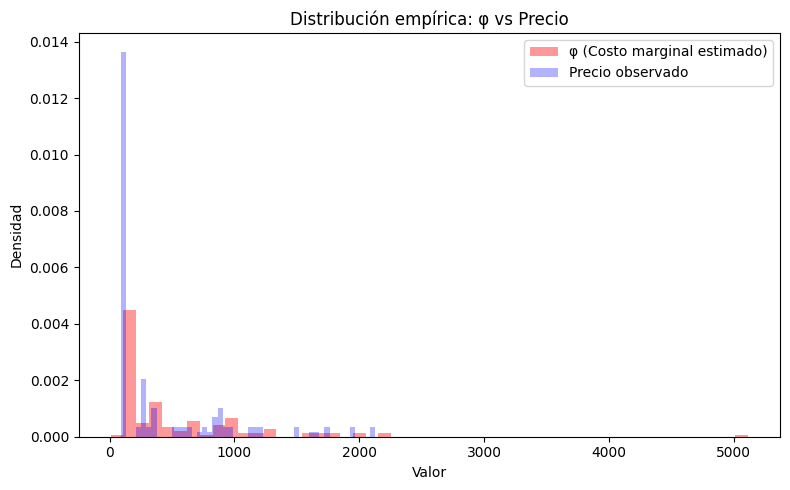

In [28]:
phi = pd.to_numeric(df_grouped['phi'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
precio = pd.to_numeric(df_grouped['precio_d'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8,5))
plt.hist(phi, bins=50, density=True, color="red", alpha=0.4, label="φ (Costo marginal estimado)")
plt.hist(precio, bins=50, density=True, color="blue", alpha=0.3, label="Precio observado")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución empírica: φ vs Precio")
plt.legend()
plt.tight_layout()
plt.show()

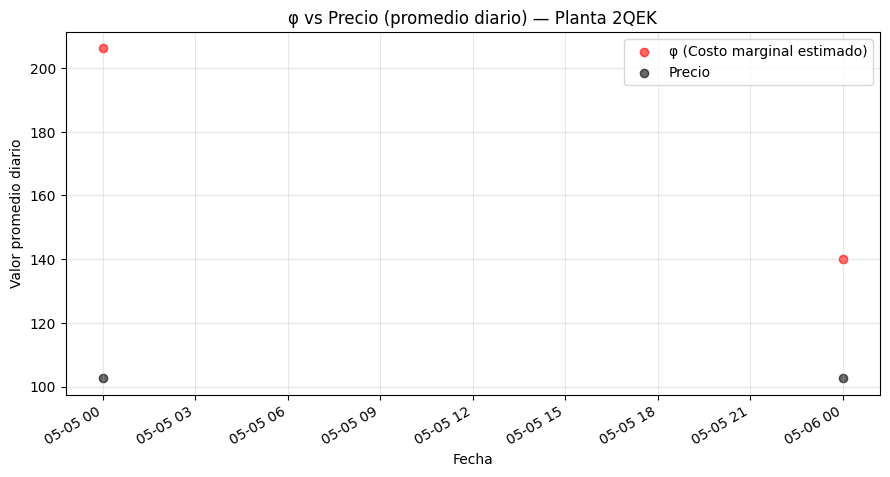

✅ Gráfico guardado: ../results/fechas_2/phi_precio_2QEK_2025-05-05_to_2025-05-06_M1.png


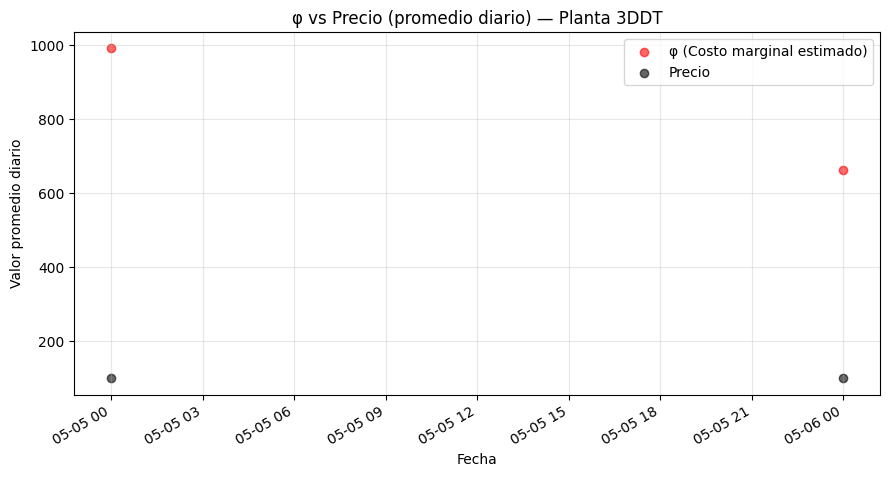

✅ Gráfico guardado: ../results/fechas_2/phi_precio_3DDT_2025-05-05_to_2025-05-06_M1.png


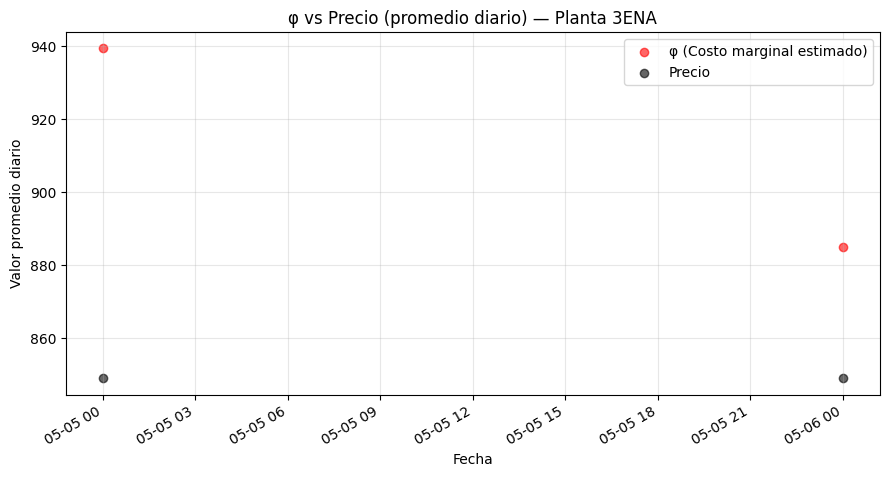

✅ Gráfico guardado: ../results/fechas_2/phi_precio_3ENA_2025-05-05_to_2025-05-06_M1.png


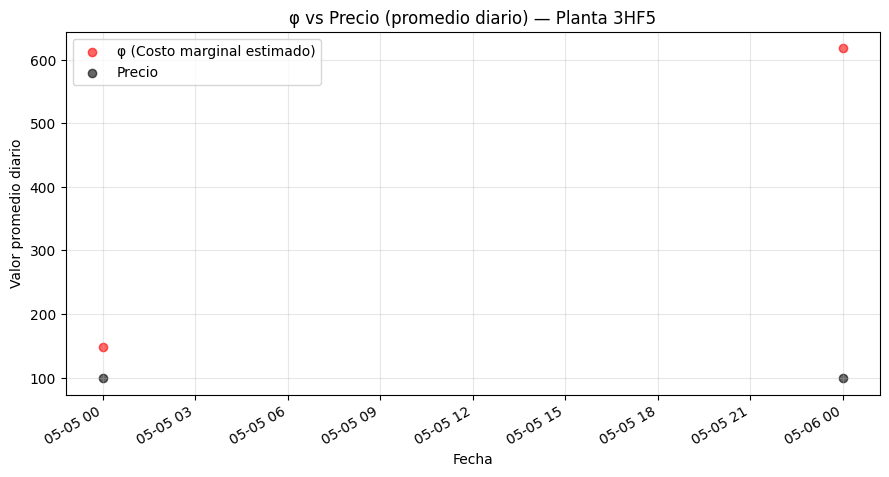

✅ Gráfico guardado: ../results/fechas_2/phi_precio_3HF5_2025-05-05_to_2025-05-06_M1.png


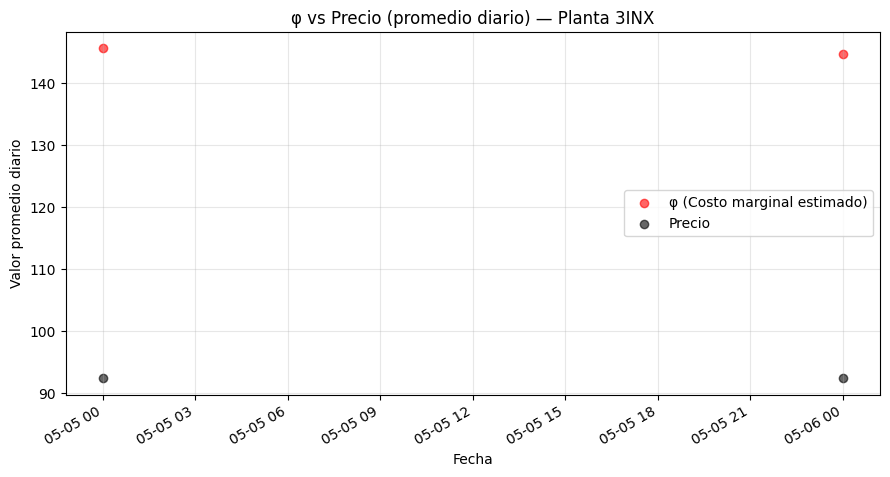

✅ Gráfico guardado: ../results/fechas_2/phi_precio_3INX_2025-05-05_to_2025-05-06_M1.png


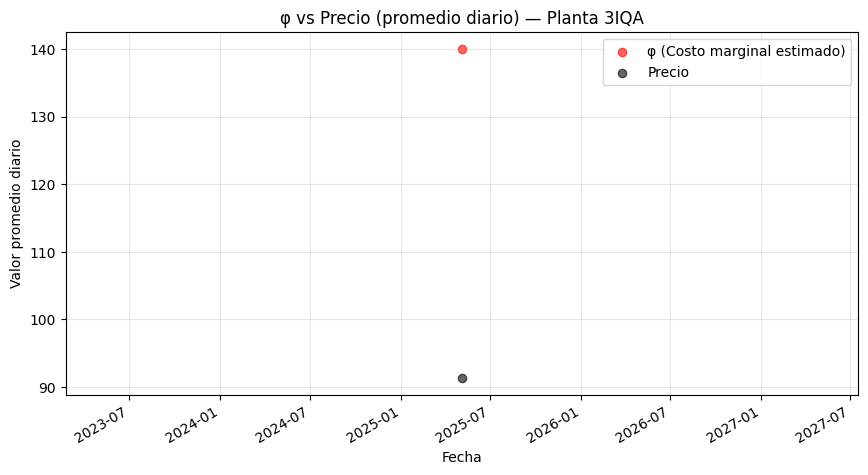

✅ Gráfico guardado: ../results/fechas_2/phi_precio_3IQA_2025-05-05_to_2025-05-05_M1.png


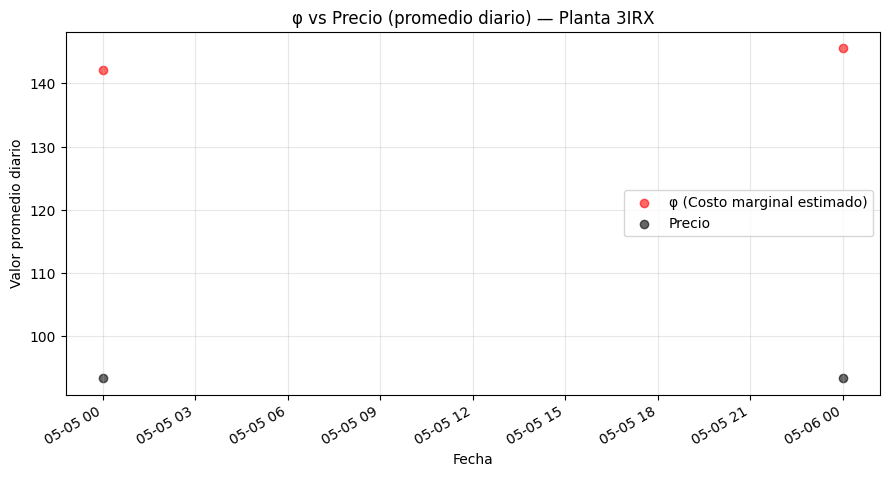

✅ Gráfico guardado: ../results/fechas_2/phi_precio_3IRX_2025-05-05_to_2025-05-06_M1.png


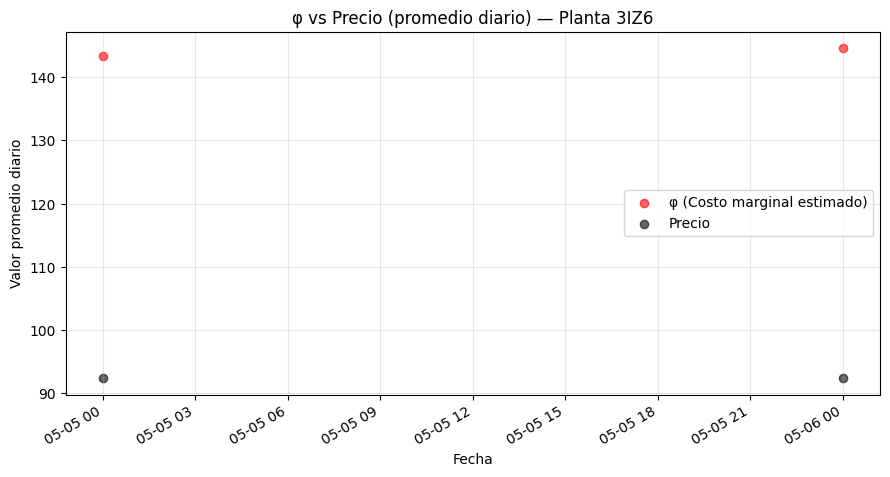

✅ Gráfico guardado: ../results/fechas_2/phi_precio_3IZ6_2025-05-05_to_2025-05-06_M1.png


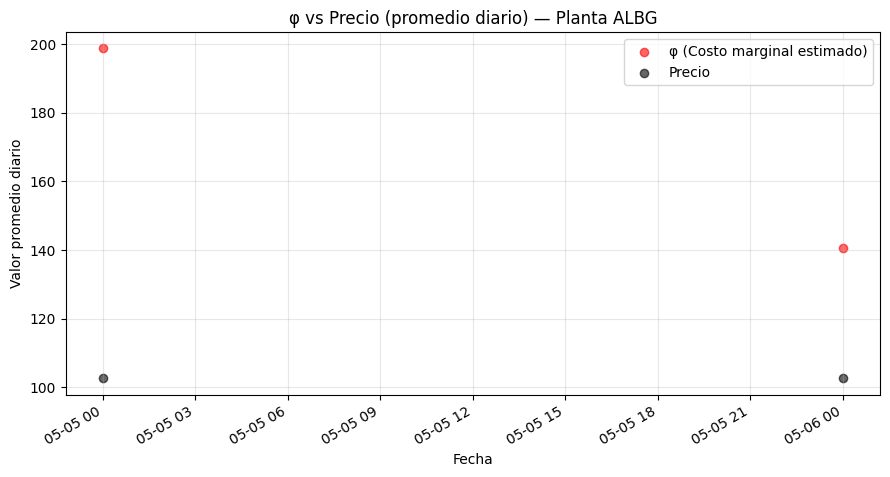

✅ Gráfico guardado: ../results/fechas_2/phi_precio_ALBG_2025-05-05_to_2025-05-06_M1.png


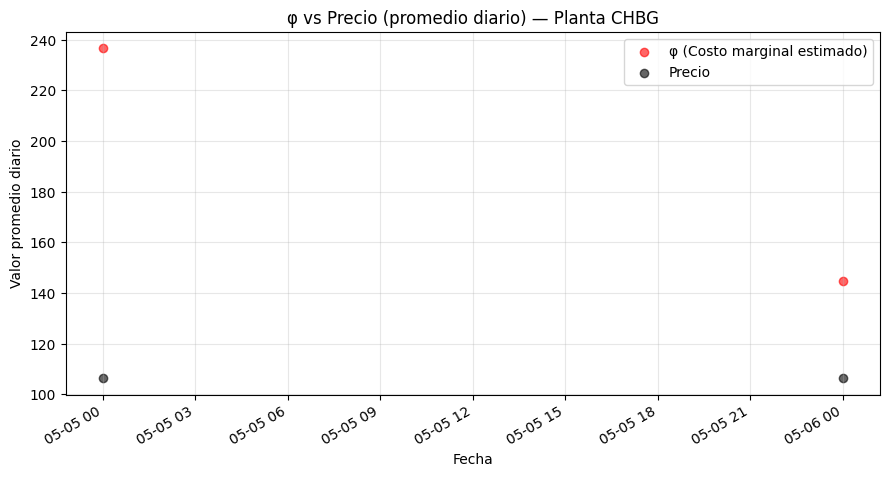

✅ Gráfico guardado: ../results/fechas_2/phi_precio_CHBG_2025-05-05_to_2025-05-06_M1.png


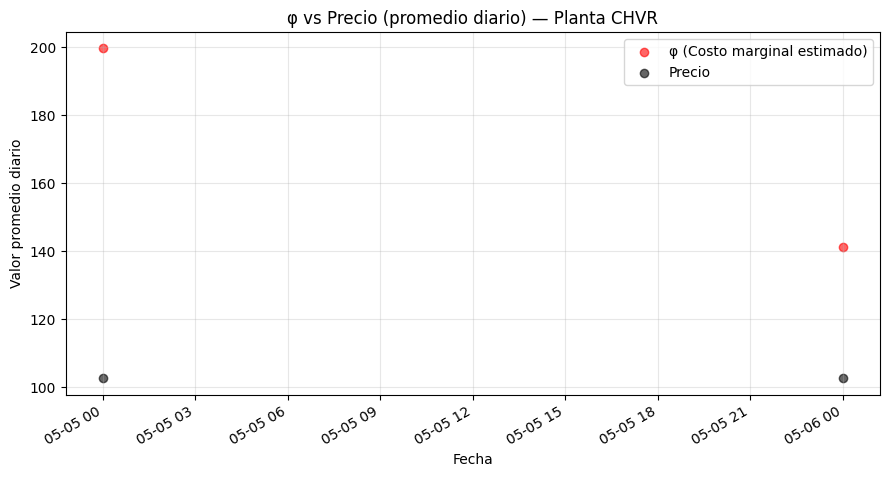

✅ Gráfico guardado: ../results/fechas_2/phi_precio_CHVR_2025-05-05_to_2025-05-06_M1.png


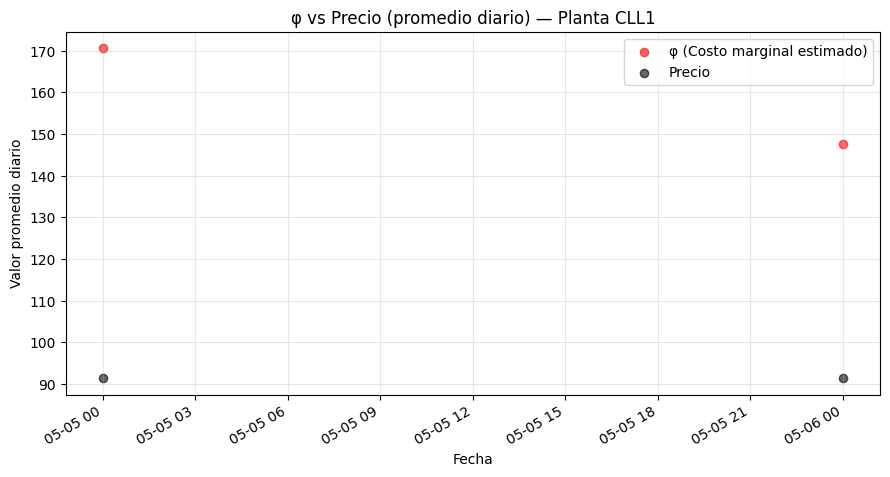

✅ Gráfico guardado: ../results/fechas_2/phi_precio_CLL1_2025-05-05_to_2025-05-06_M1.png


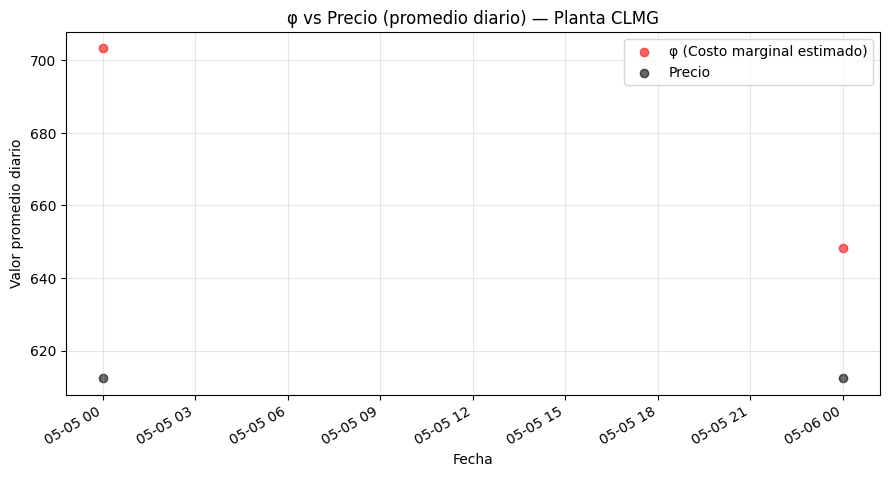

✅ Gráfico guardado: ../results/fechas_2/phi_precio_CLMG_2025-05-05_to_2025-05-06_M1.png


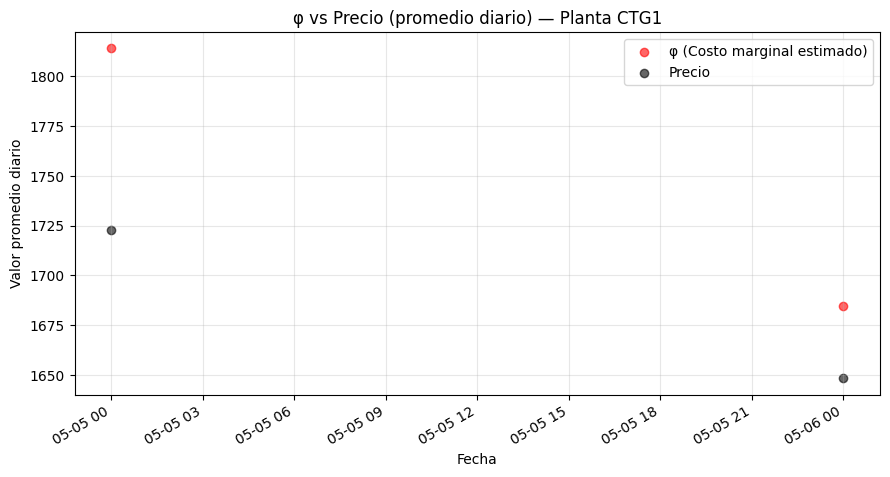

✅ Gráfico guardado: ../results/fechas_2/phi_precio_CTG1_2025-05-05_to_2025-05-06_M1.png


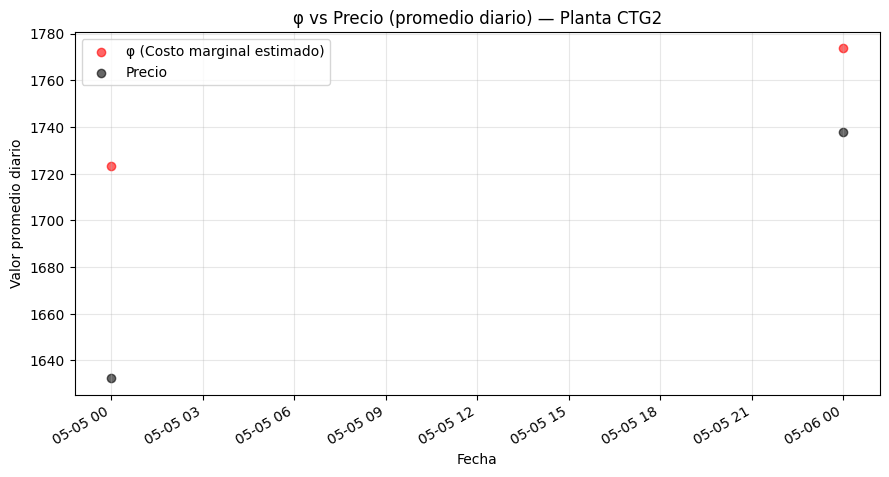

✅ Gráfico guardado: ../results/fechas_2/phi_precio_CTG2_2025-05-05_to_2025-05-06_M1.png


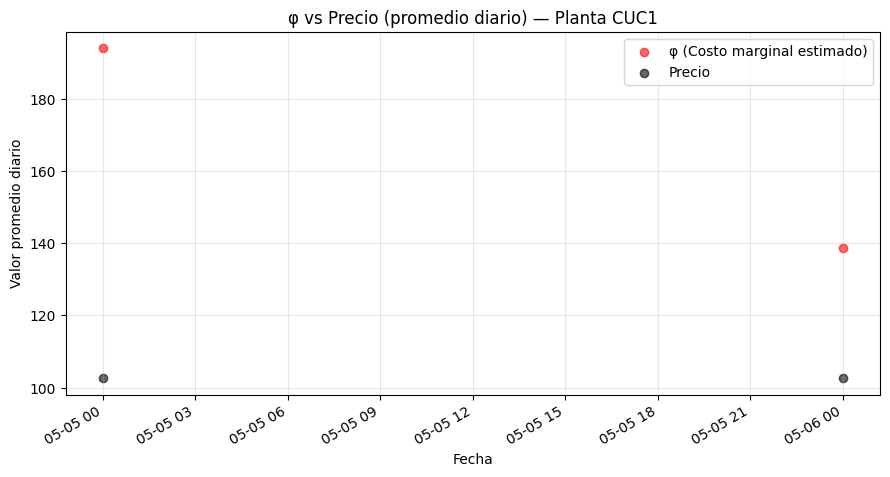

✅ Gráfico guardado: ../results/fechas_2/phi_precio_CUC1_2025-05-05_to_2025-05-06_M1.png


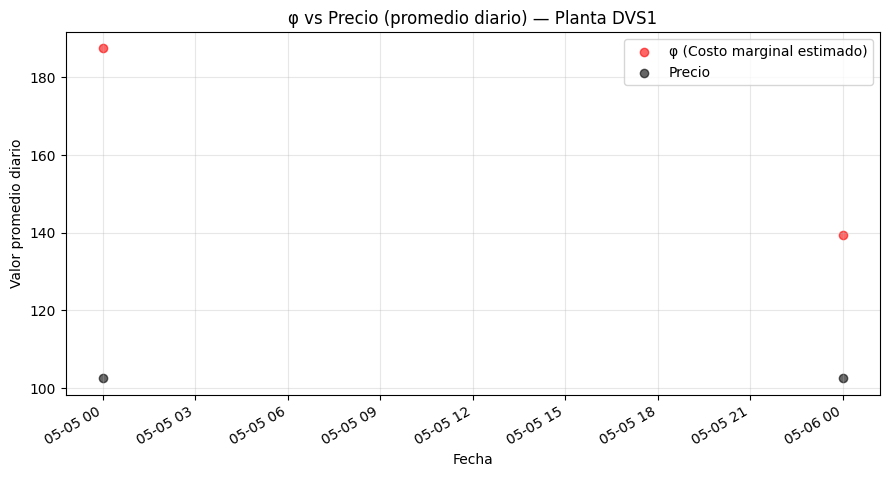

✅ Gráfico guardado: ../results/fechas_2/phi_precio_DVS1_2025-05-05_to_2025-05-06_M1.png


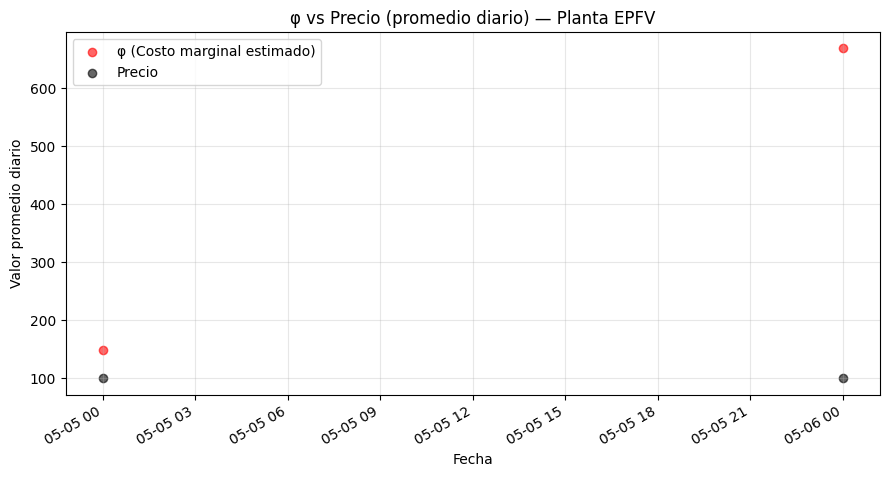

✅ Gráfico guardado: ../results/fechas_2/phi_precio_EPFV_2025-05-05_to_2025-05-06_M1.png


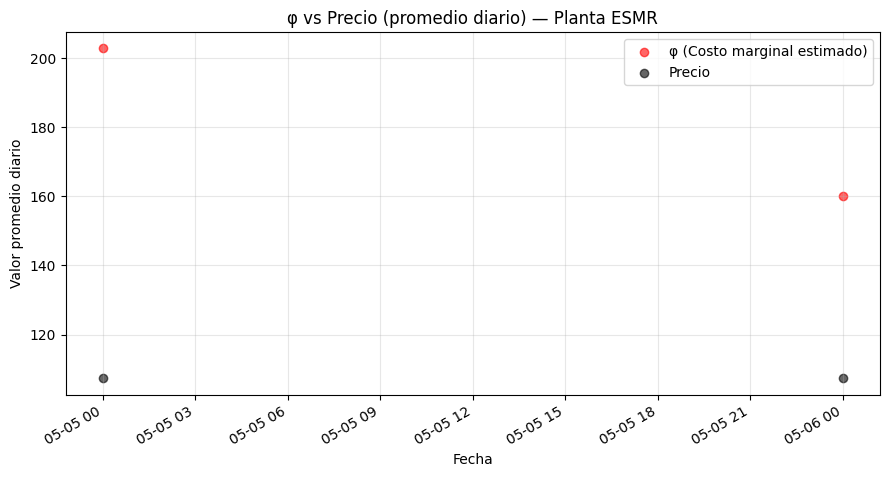

✅ Gráfico guardado: ../results/fechas_2/phi_precio_ESMR_2025-05-05_to_2025-05-06_M1.png


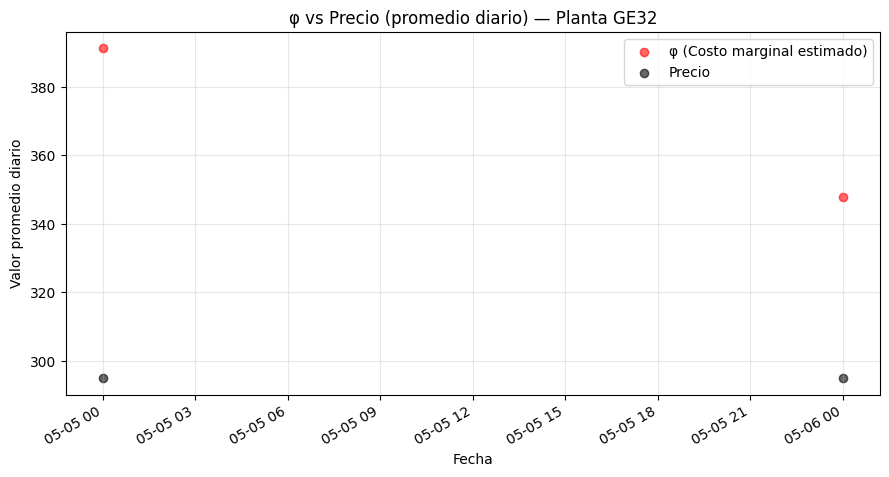

✅ Gráfico guardado: ../results/fechas_2/phi_precio_GE32_2025-05-05_to_2025-05-06_M1.png


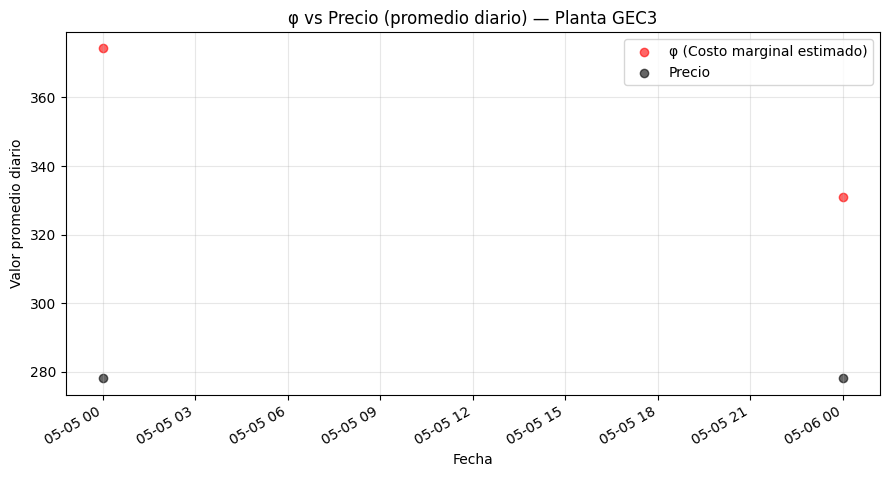

✅ Gráfico guardado: ../results/fechas_2/phi_precio_GEC3_2025-05-05_to_2025-05-06_M1.png


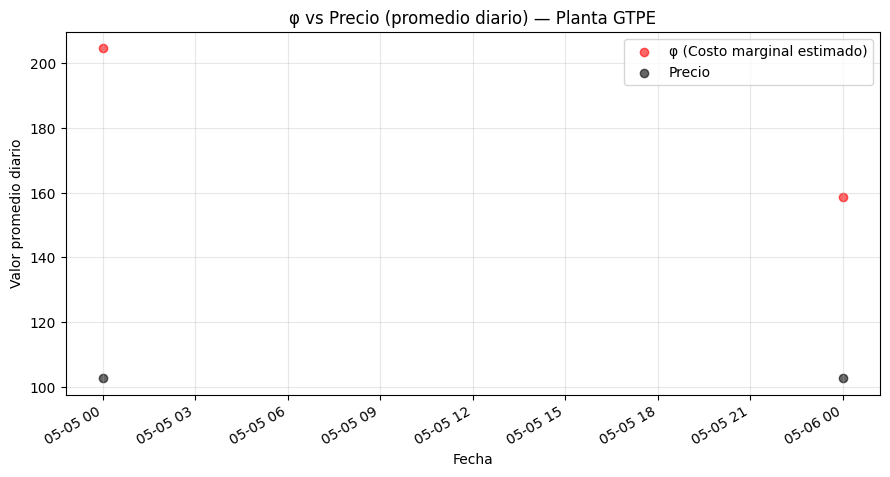

✅ Gráfico guardado: ../results/fechas_2/phi_precio_GTPE_2025-05-05_to_2025-05-06_M1.png


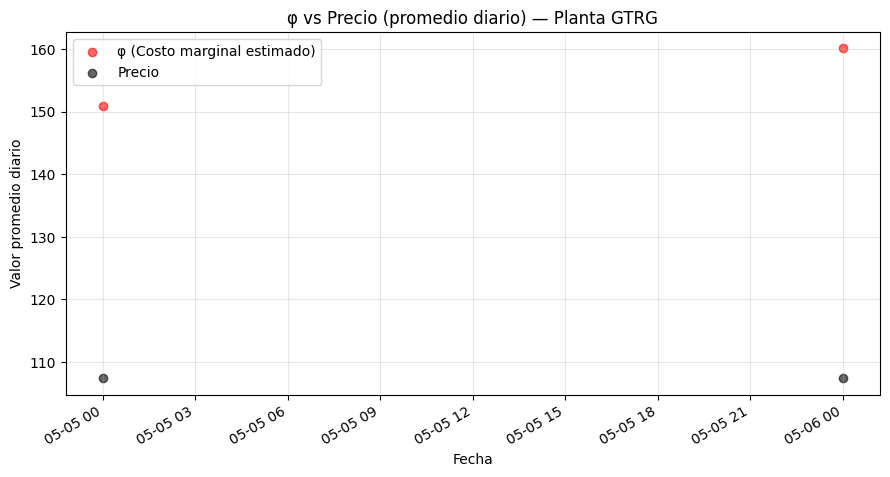

✅ Gráfico guardado: ../results/fechas_2/phi_precio_GTRG_2025-05-05_to_2025-05-06_M1.png


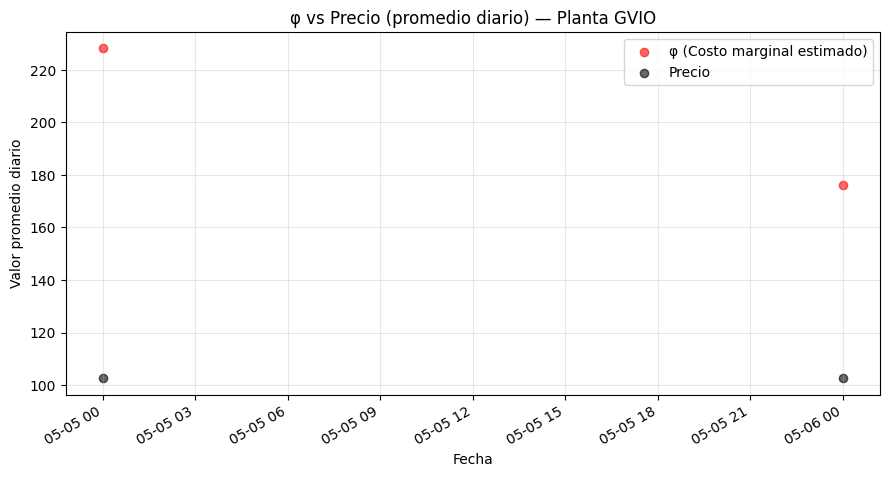

✅ Gráfico guardado: ../results/fechas_2/phi_precio_GVIO_2025-05-05_to_2025-05-06_M1.png


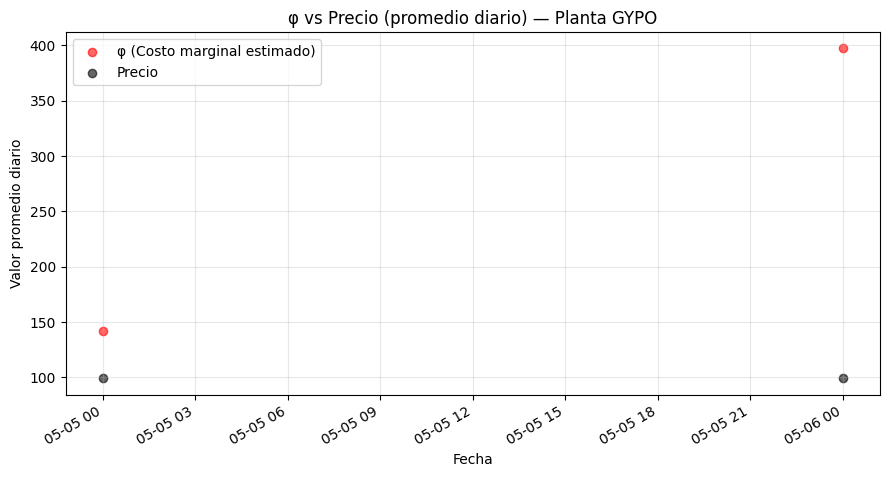

✅ Gráfico guardado: ../results/fechas_2/phi_precio_GYPO_2025-05-05_to_2025-05-06_M1.png


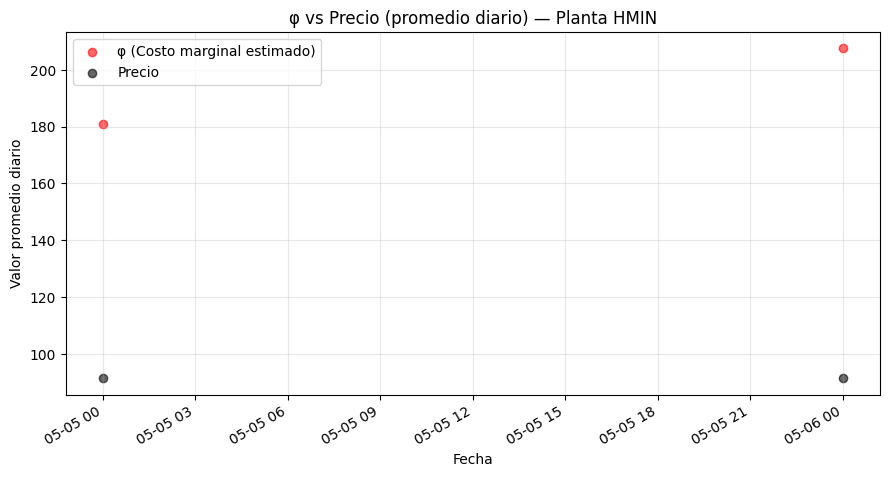

✅ Gráfico guardado: ../results/fechas_2/phi_precio_HMIN_2025-05-05_to_2025-05-06_M1.png


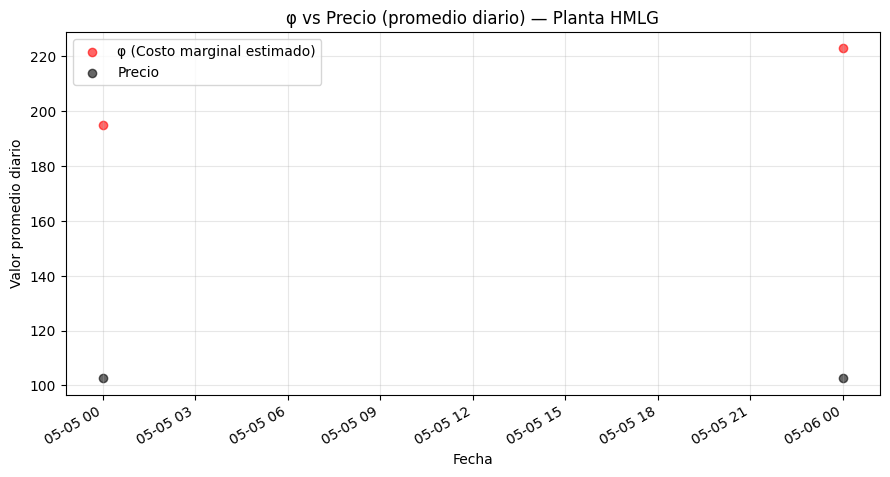

✅ Gráfico guardado: ../results/fechas_2/phi_precio_HMLG_2025-05-05_to_2025-05-06_M1.png


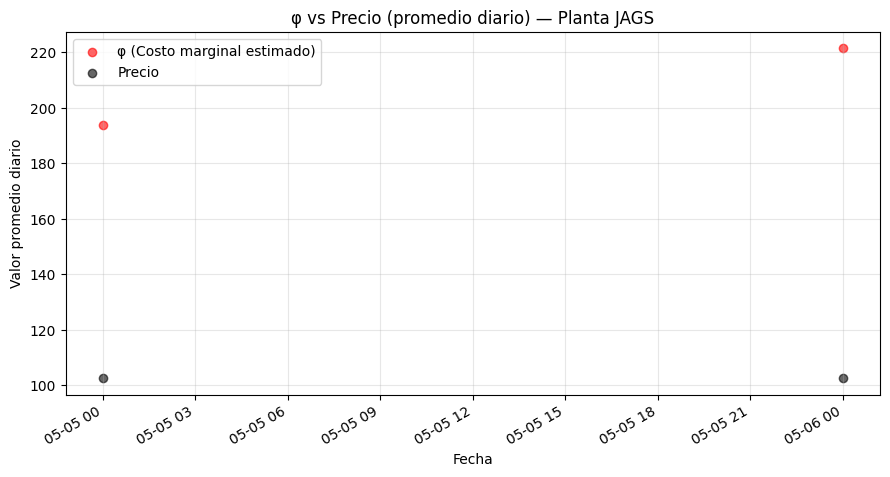

✅ Gráfico guardado: ../results/fechas_2/phi_precio_JAGS_2025-05-05_to_2025-05-06_M1.png


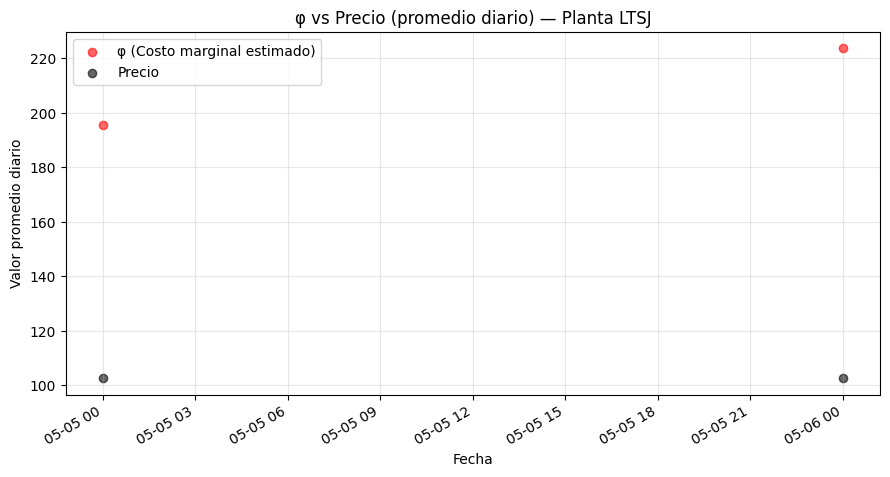

✅ Gráfico guardado: ../results/fechas_2/phi_precio_LTSJ_2025-05-05_to_2025-05-06_M1.png


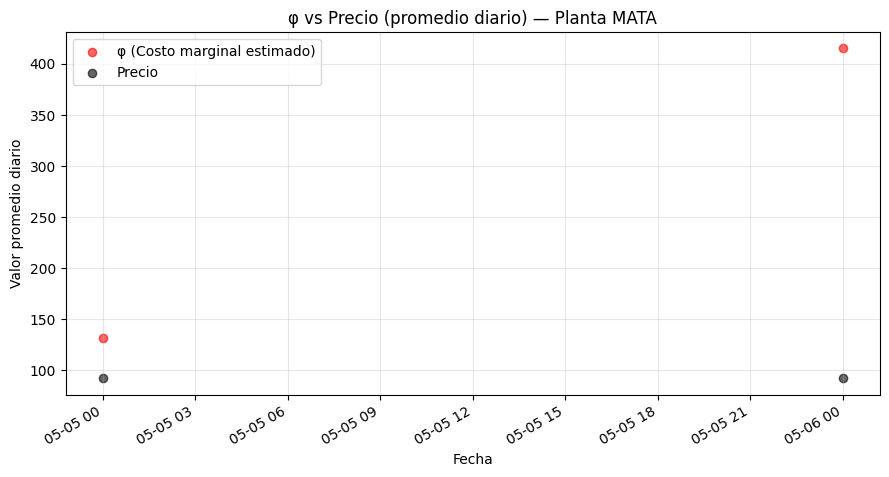

✅ Gráfico guardado: ../results/fechas_2/phi_precio_MATA_2025-05-05_to_2025-05-06_M1.png


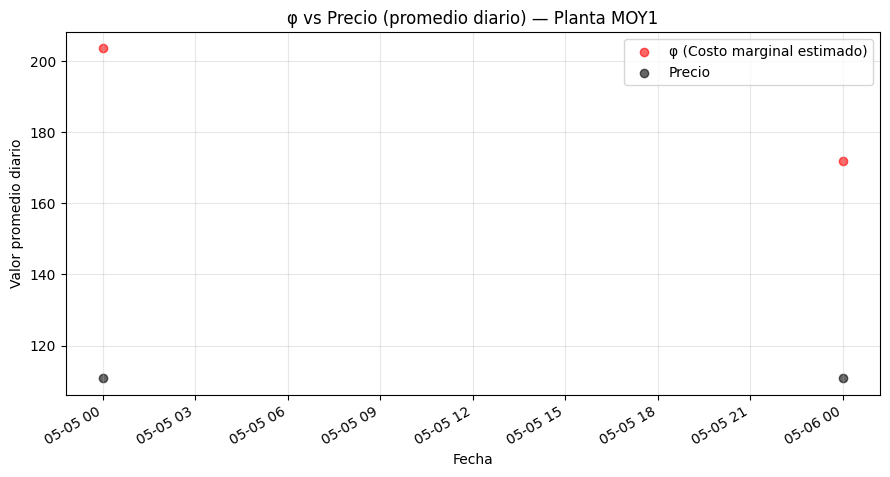

✅ Gráfico guardado: ../results/fechas_2/phi_precio_MOY1_2025-05-05_to_2025-05-06_M1.png


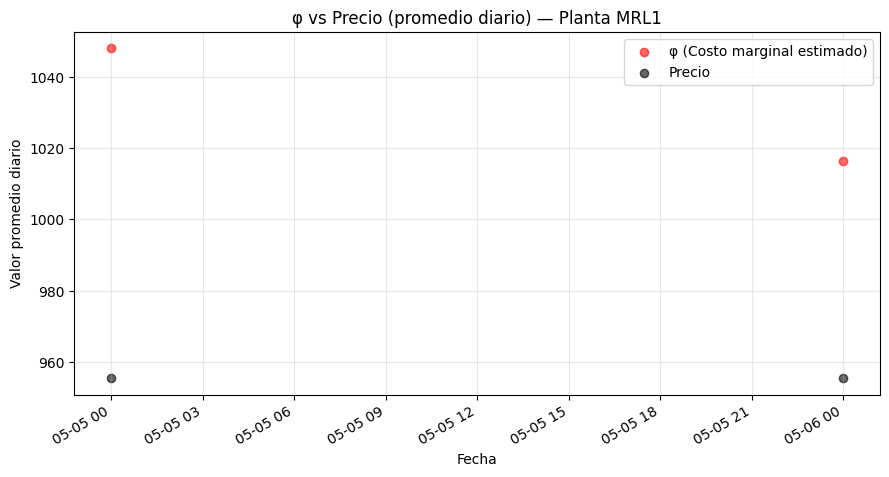

✅ Gráfico guardado: ../results/fechas_2/phi_precio_MRL1_2025-05-05_to_2025-05-06_M1.png


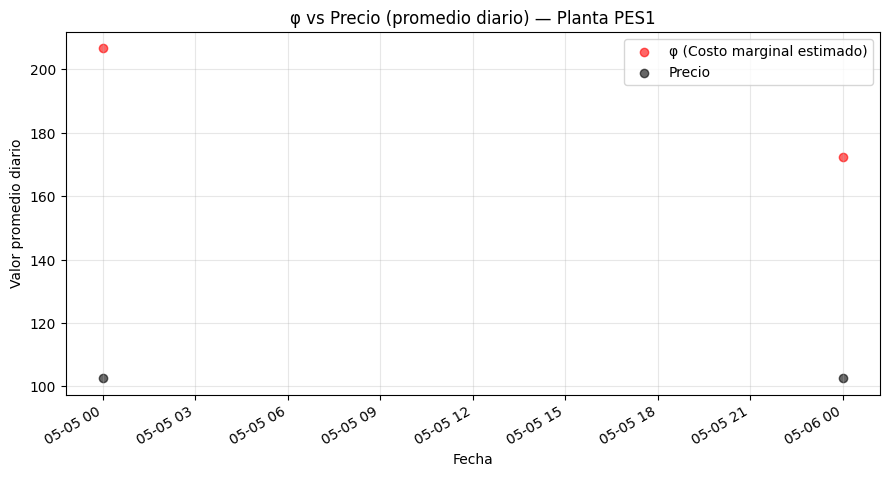

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PES1_2025-05-05_to_2025-05-06_M1.png


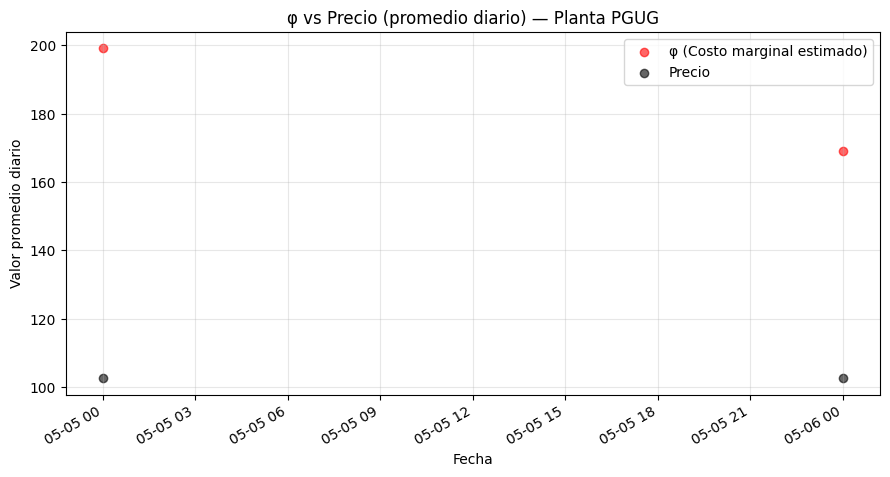

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PGUG_2025-05-05_to_2025-05-06_M1.png


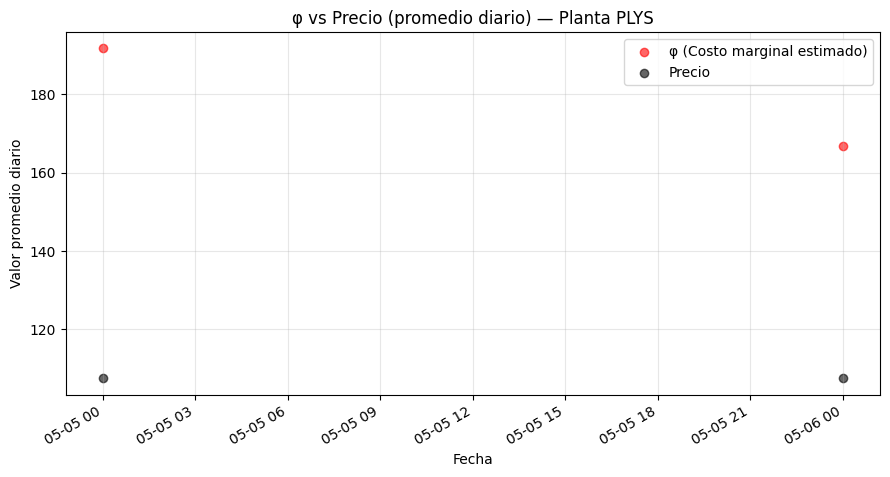

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PLYS_2025-05-05_to_2025-05-06_M1.png


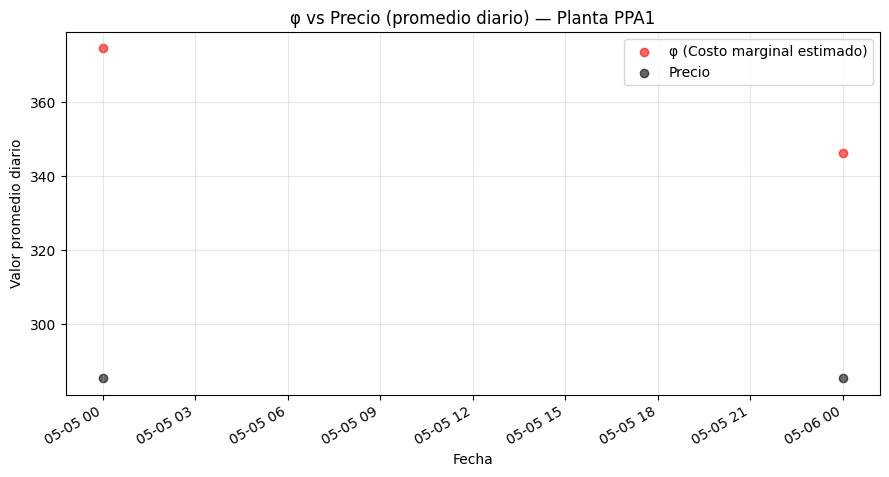

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PPA1_2025-05-05_to_2025-05-06_M1.png


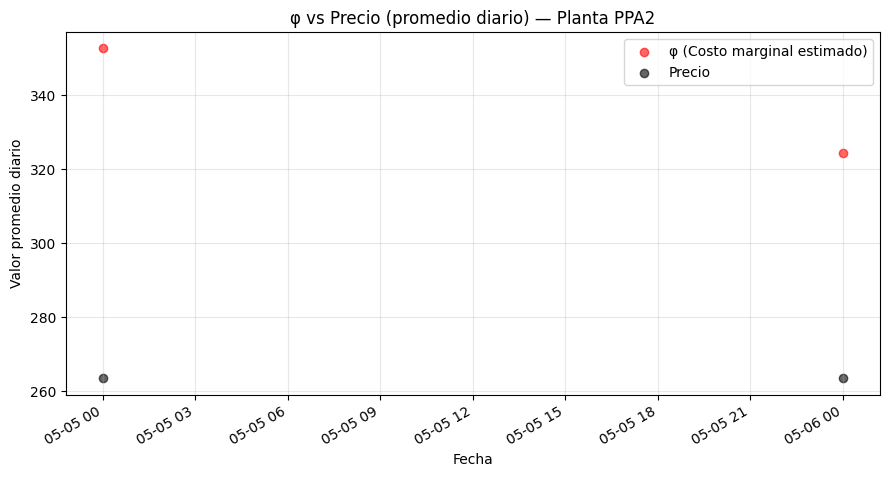

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PPA2_2025-05-05_to_2025-05-06_M1.png


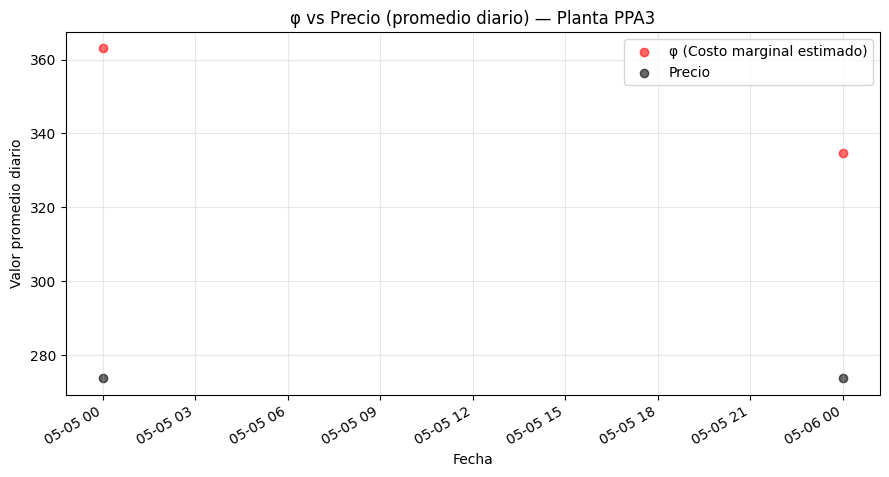

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PPA3_2025-05-05_to_2025-05-06_M1.png


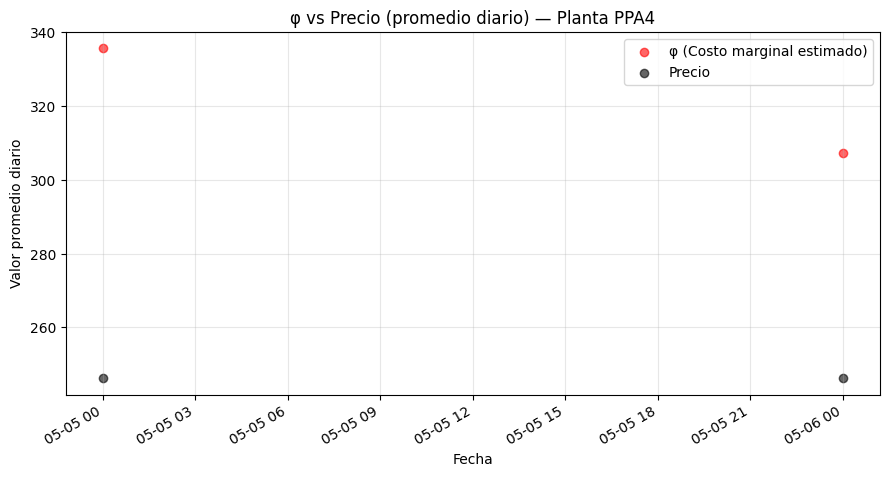

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PPA4_2025-05-05_to_2025-05-06_M1.png


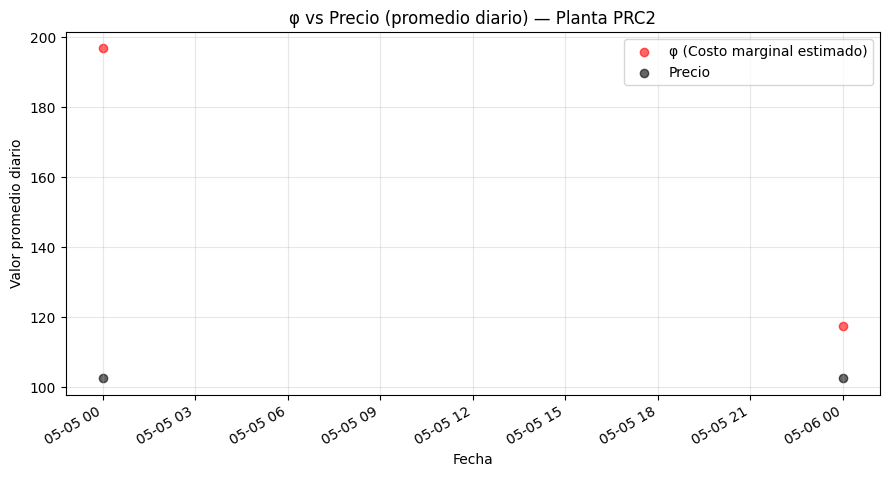

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PRC2_2025-05-05_to_2025-05-06_M1.png


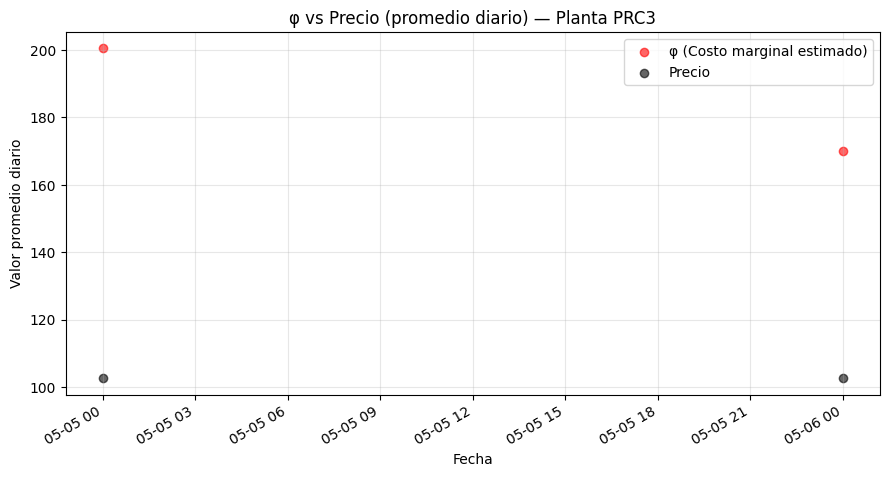

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PRC3_2025-05-05_to_2025-05-06_M1.png


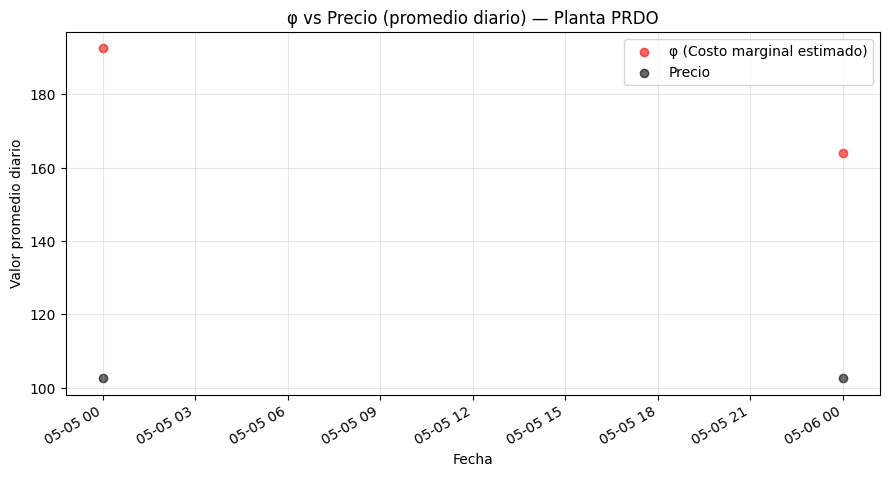

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PRDO_2025-05-05_to_2025-05-06_M1.png


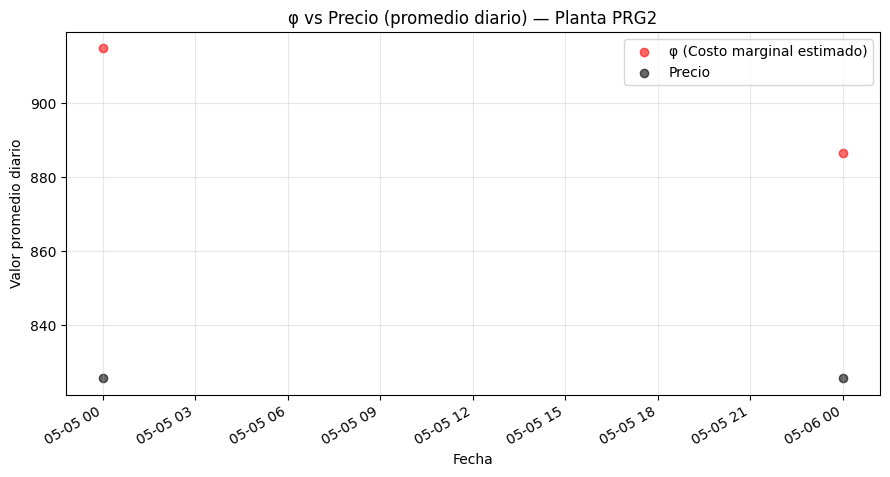

✅ Gráfico guardado: ../results/fechas_2/phi_precio_PRG2_2025-05-05_to_2025-05-06_M1.png


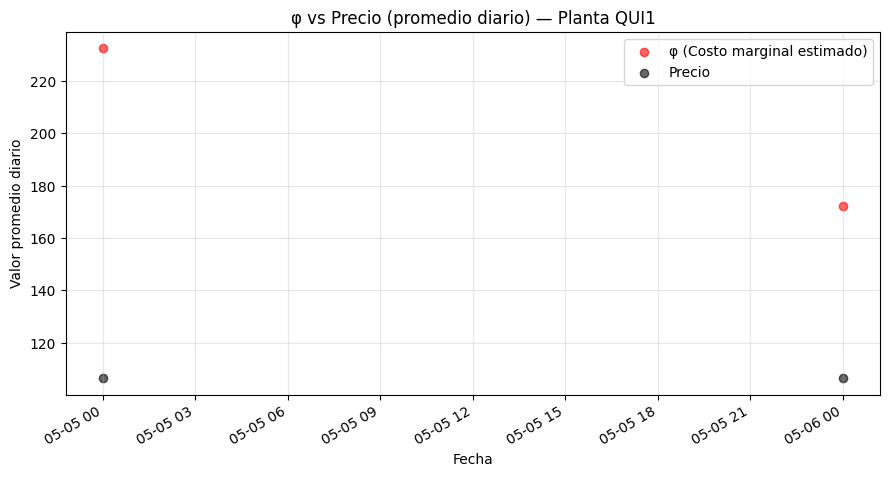

✅ Gráfico guardado: ../results/fechas_2/phi_precio_QUI1_2025-05-05_to_2025-05-06_M1.png


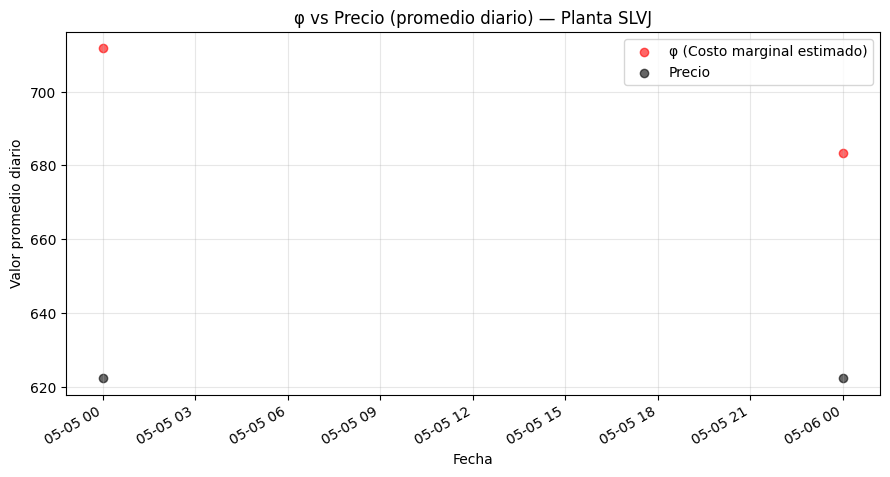

✅ Gráfico guardado: ../results/fechas_2/phi_precio_SLVJ_2025-05-05_to_2025-05-06_M1.png


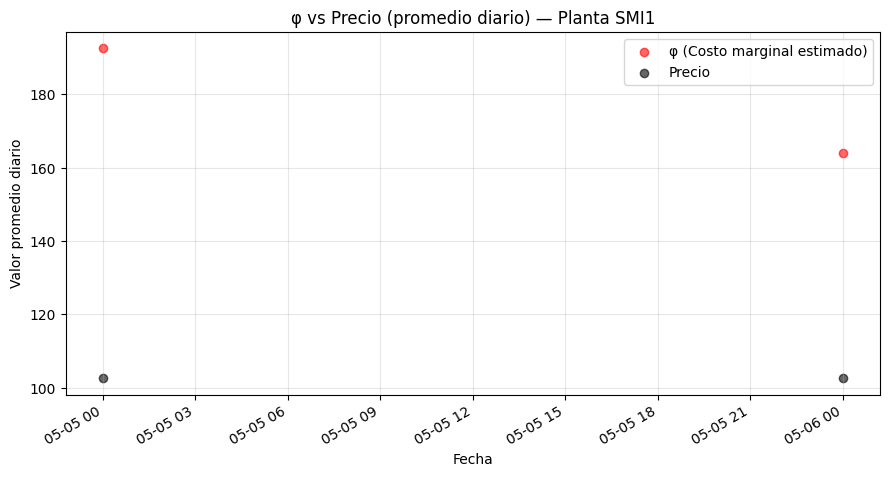

✅ Gráfico guardado: ../results/fechas_2/phi_precio_SMI1_2025-05-05_to_2025-05-06_M1.png


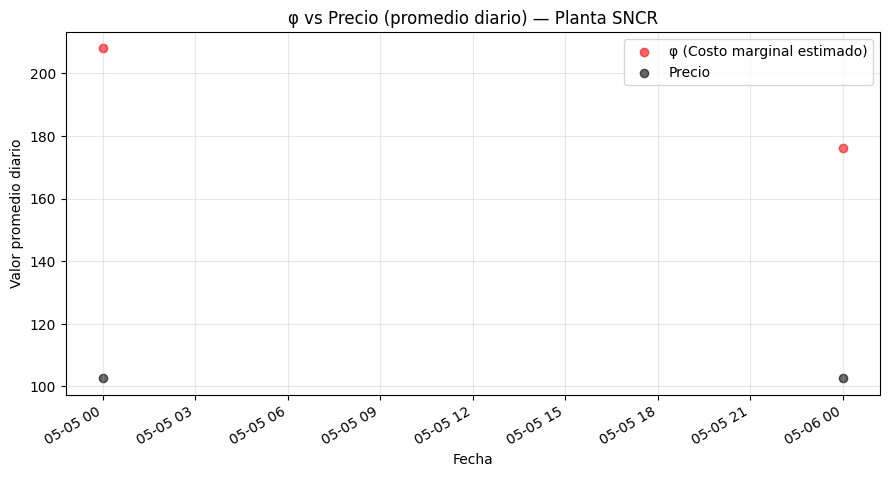

✅ Gráfico guardado: ../results/fechas_2/phi_precio_SNCR_2025-05-05_to_2025-05-06_M1.png


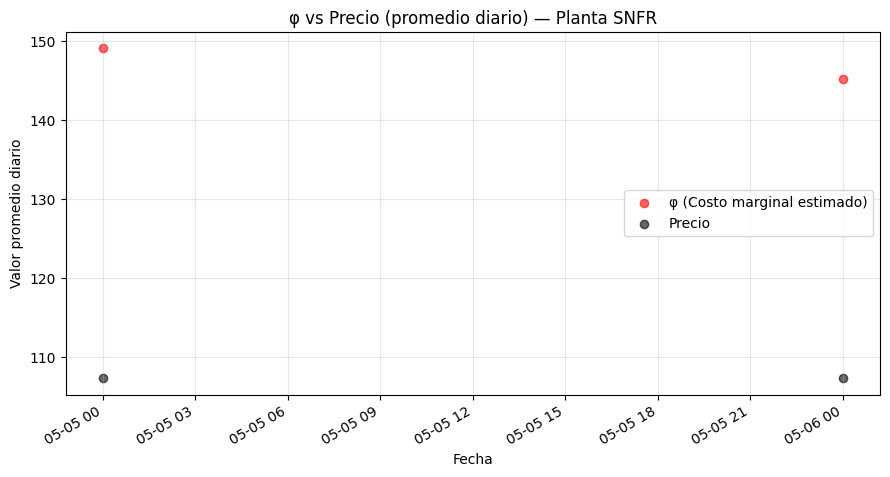

✅ Gráfico guardado: ../results/fechas_2/phi_precio_SNFR_2025-05-05_to_2025-05-06_M1.png


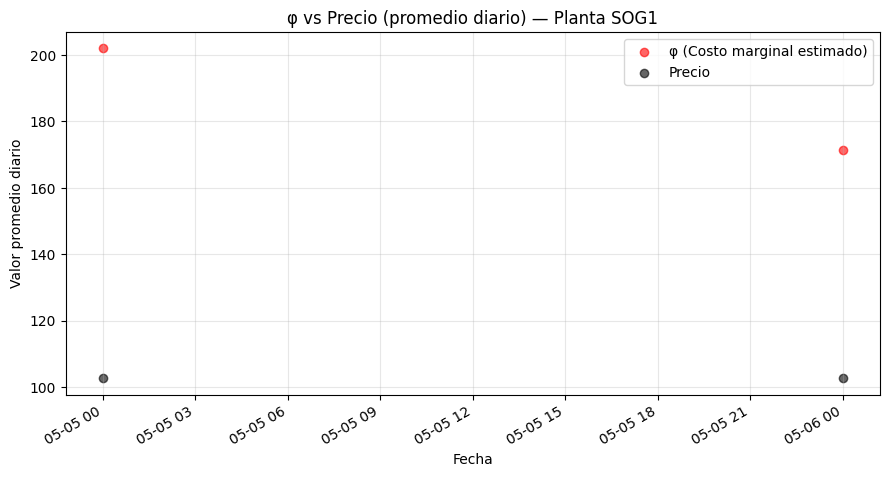

✅ Gráfico guardado: ../results/fechas_2/phi_precio_SOG1_2025-05-05_to_2025-05-06_M1.png


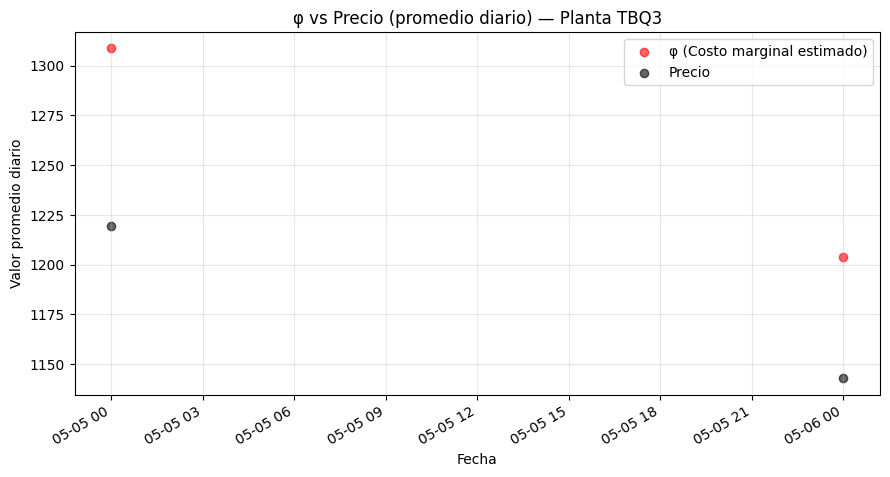

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TBQ3_2025-05-05_to_2025-05-06_M1.png


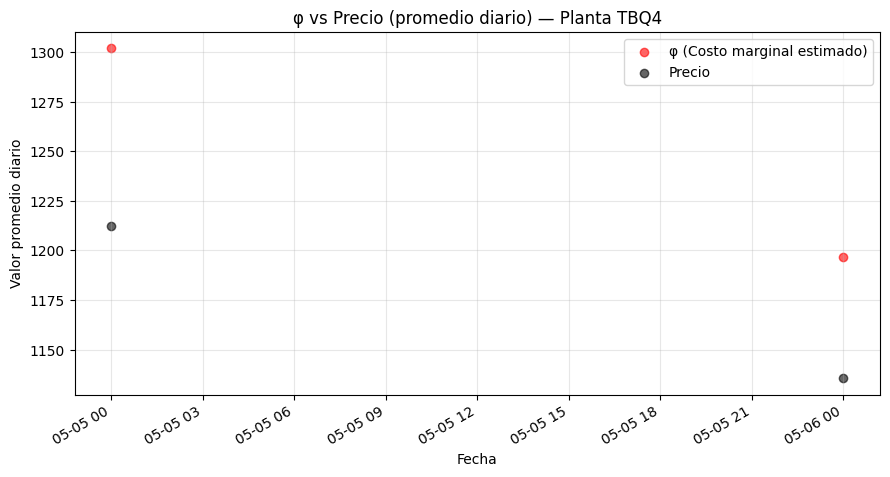

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TBQ4_2025-05-05_to_2025-05-06_M1.png


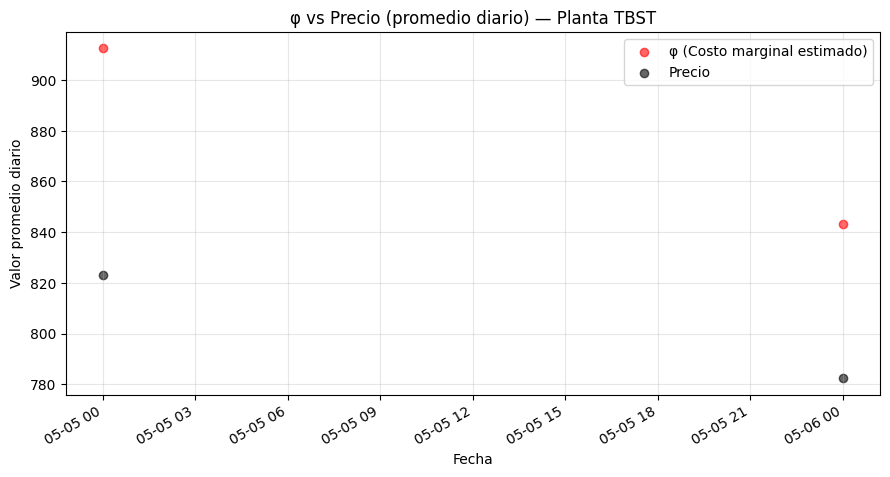

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TBST_2025-05-05_to_2025-05-06_M1.png


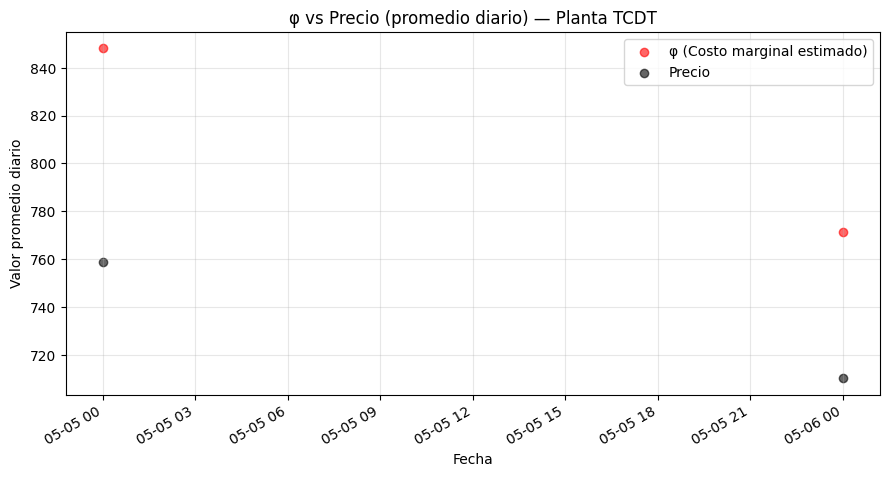

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TCDT_2025-05-05_to_2025-05-06_M1.png


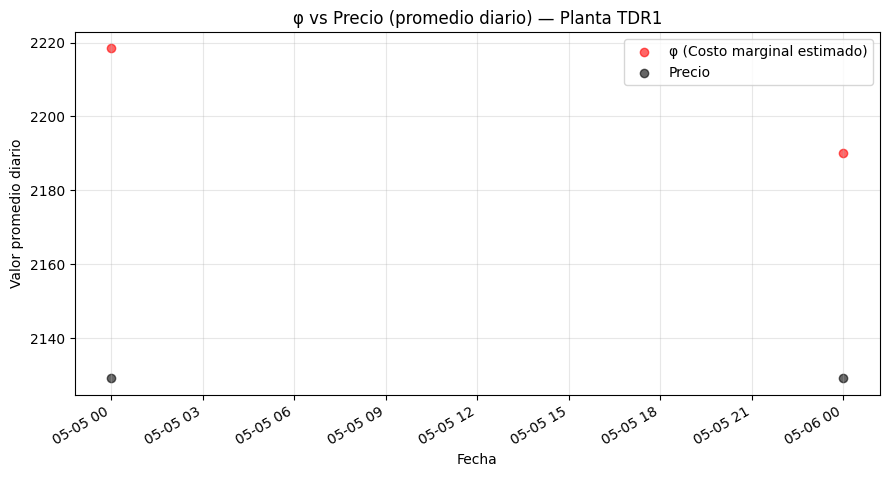

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TDR1_2025-05-05_to_2025-05-06_M1.png


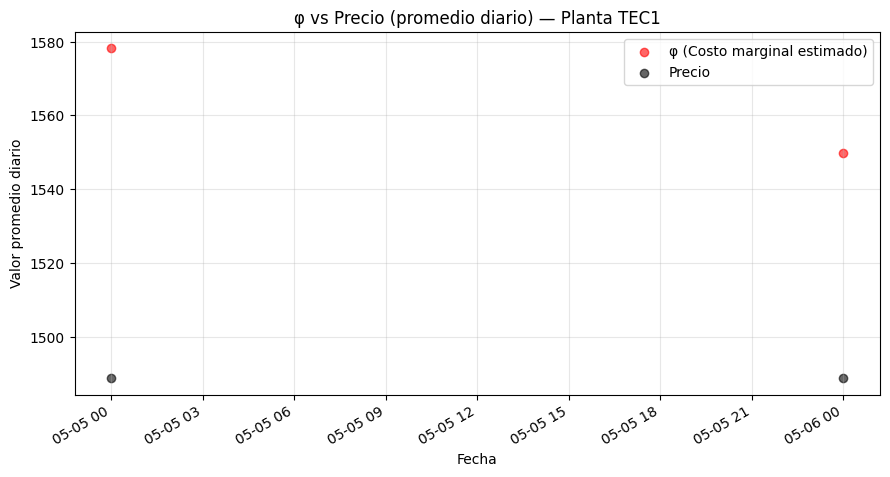

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TEC1_2025-05-05_to_2025-05-06_M1.png


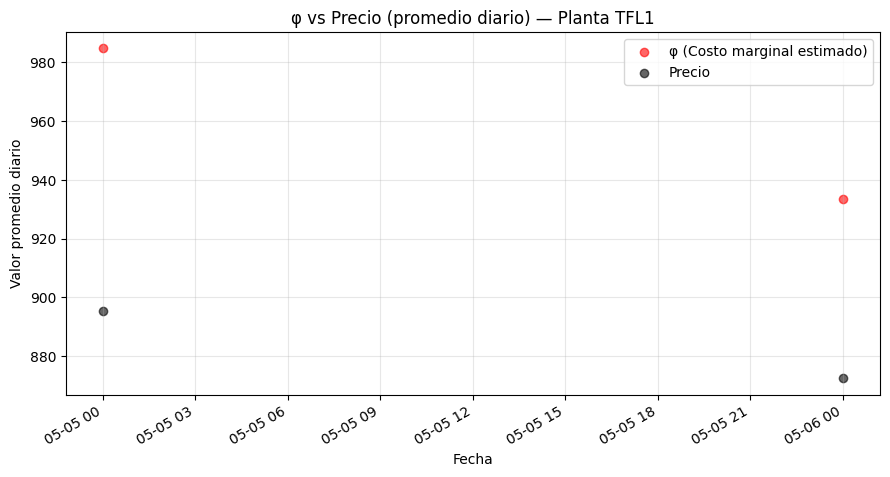

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TFL1_2025-05-05_to_2025-05-06_M1.png


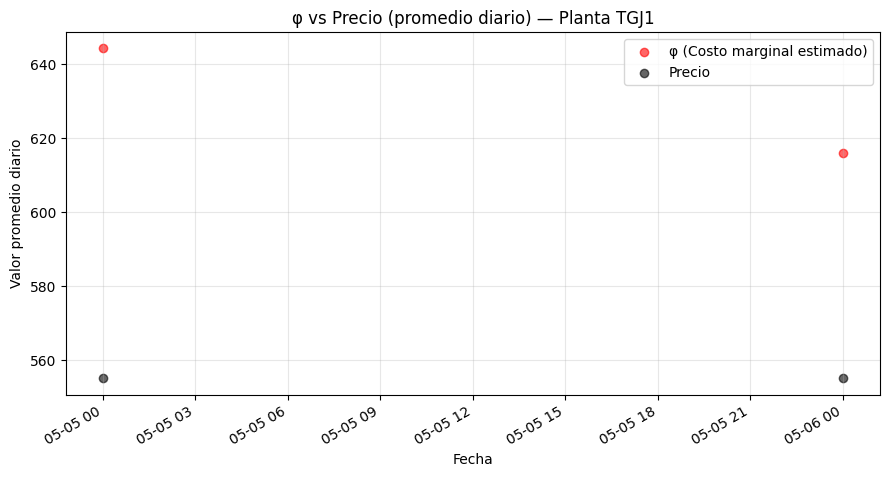

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TGJ1_2025-05-05_to_2025-05-06_M1.png


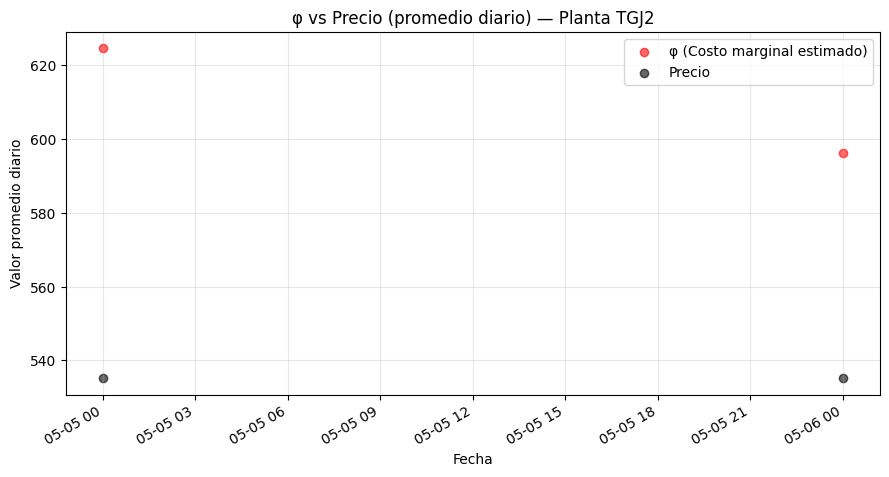

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TGJ2_2025-05-05_to_2025-05-06_M1.png


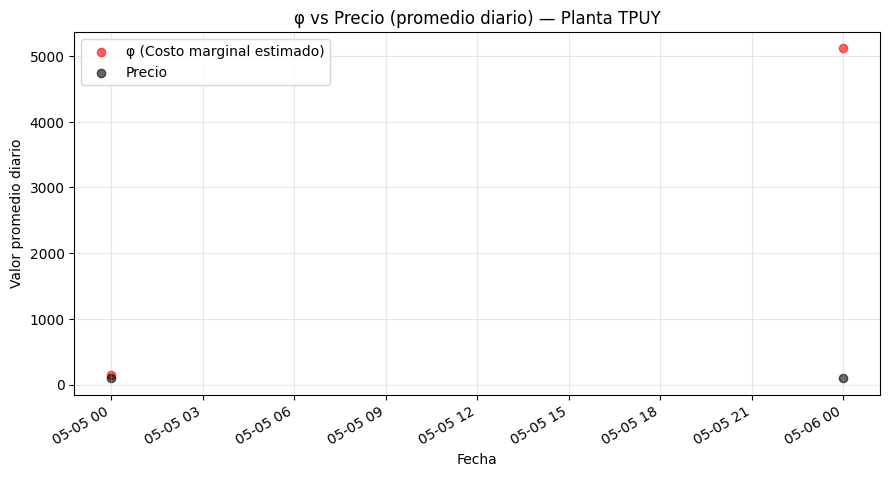

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TPUY_2025-05-05_to_2025-05-06_M1.png


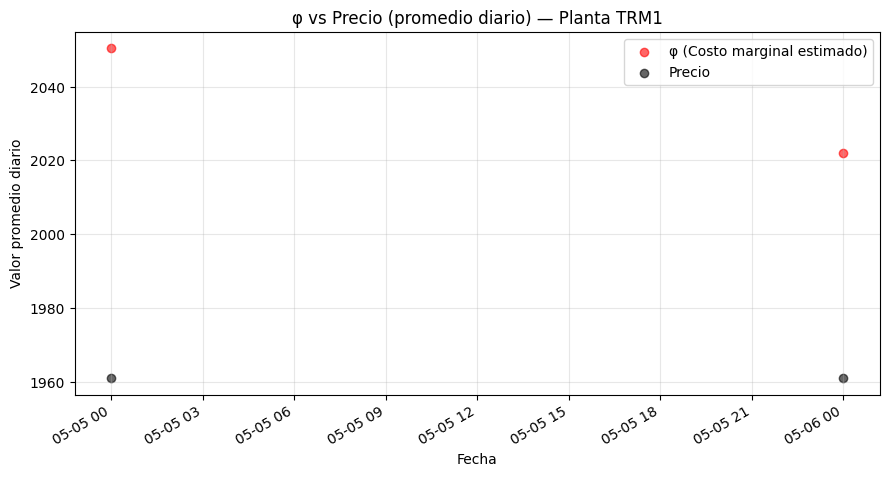

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TRM1_2025-05-05_to_2025-05-06_M1.png


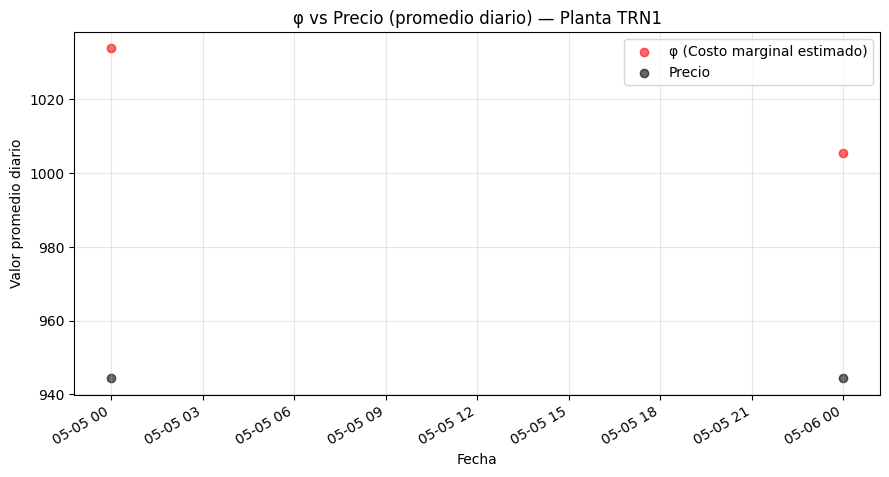

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TRN1_2025-05-05_to_2025-05-06_M1.png


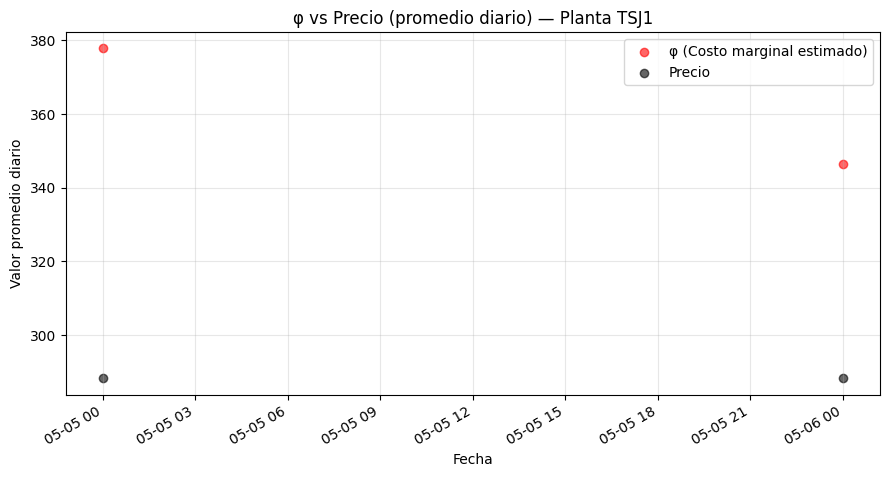

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TSJ1_2025-05-05_to_2025-05-06_M1.png


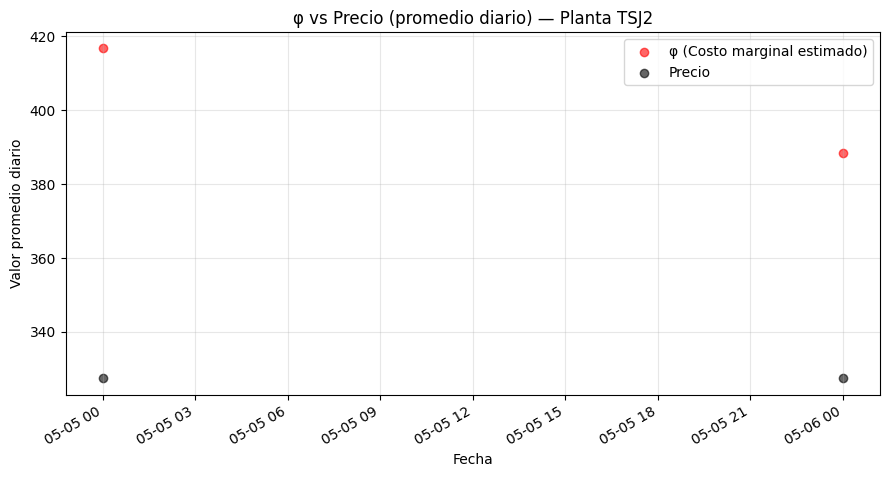

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TSJ2_2025-05-05_to_2025-05-06_M1.png


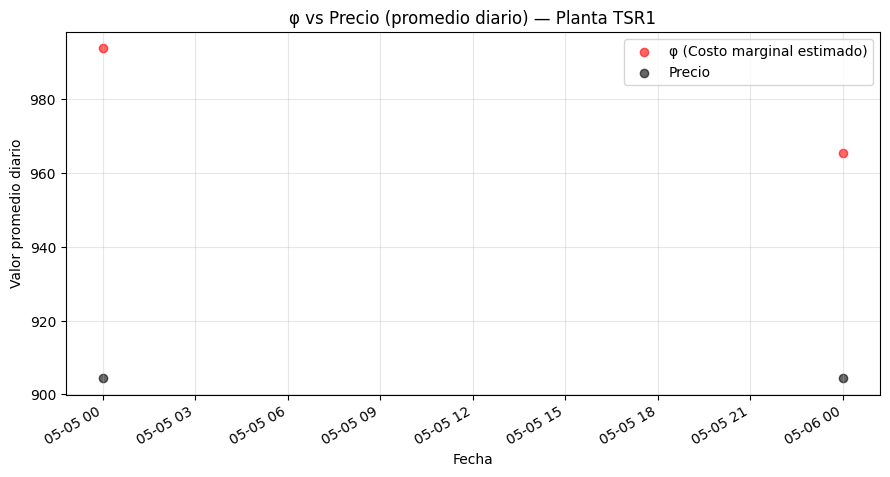

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TSR1_2025-05-05_to_2025-05-06_M1.png


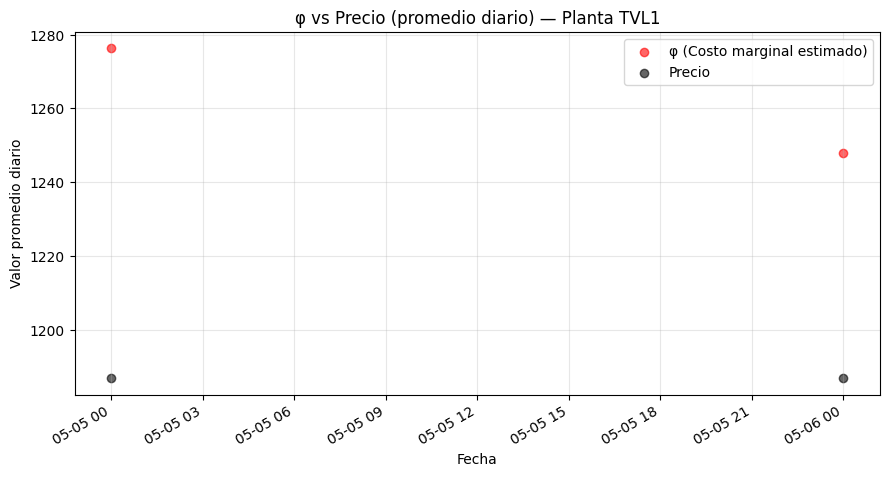

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TVL1_2025-05-05_to_2025-05-06_M1.png


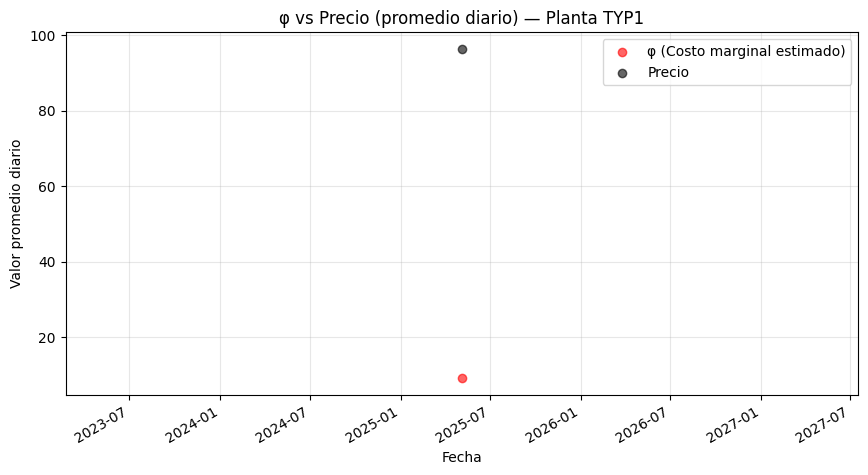

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TYP1_2025-05-05_to_2025-05-05_M1.png


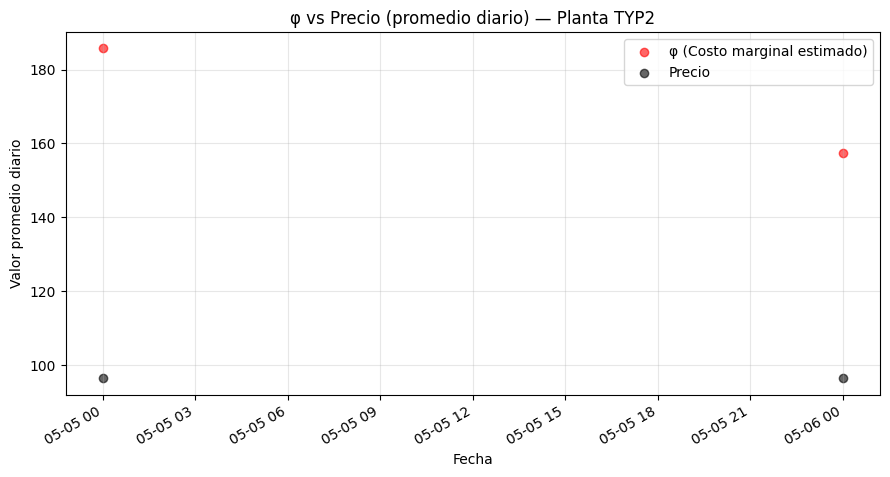

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TYP2_2025-05-05_to_2025-05-06_M1.png


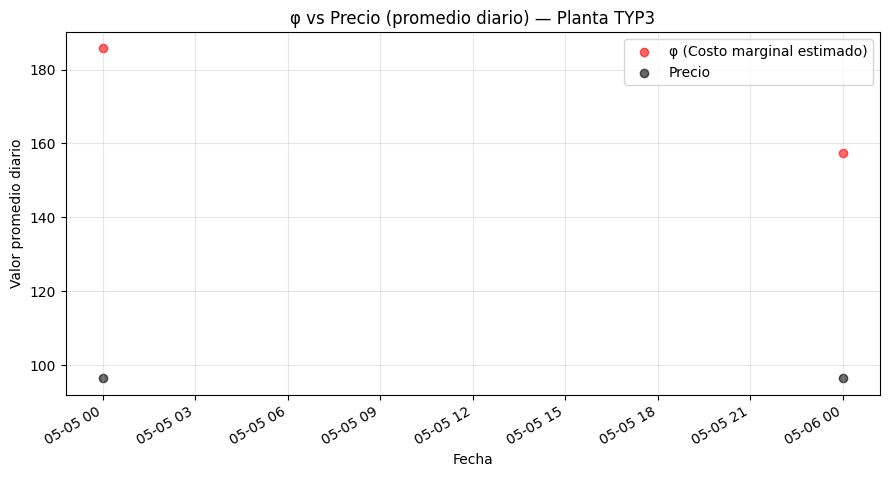

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TYP3_2025-05-05_to_2025-05-06_M1.png


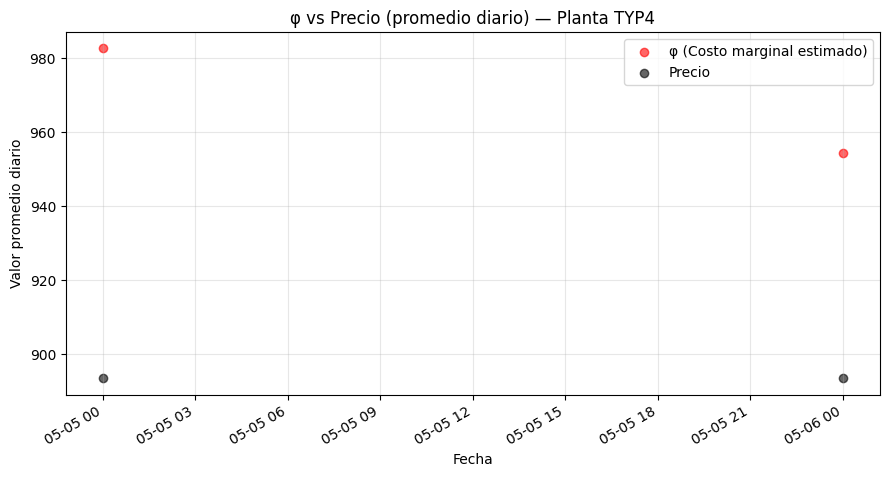

✅ Gráfico guardado: ../results/fechas_2/phi_precio_TYP4_2025-05-05_to_2025-05-06_M1.png


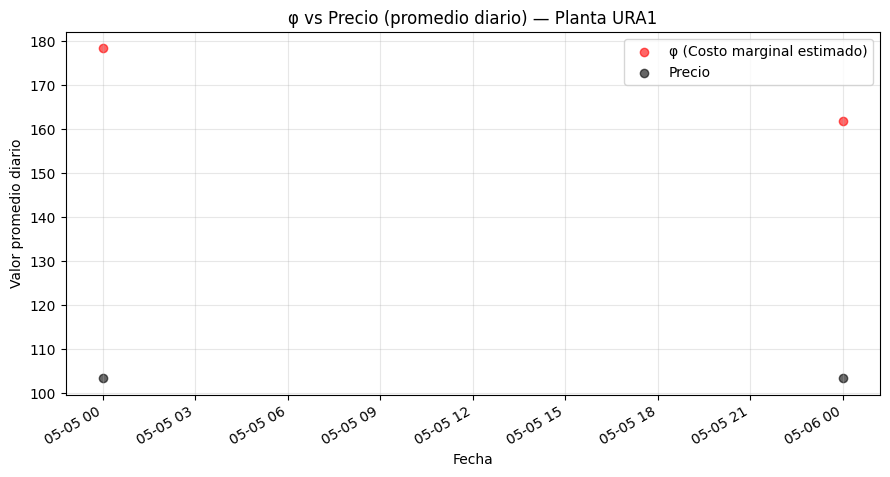

✅ Gráfico guardado: ../results/fechas_2/phi_precio_URA1_2025-05-05_to_2025-05-06_M1.png


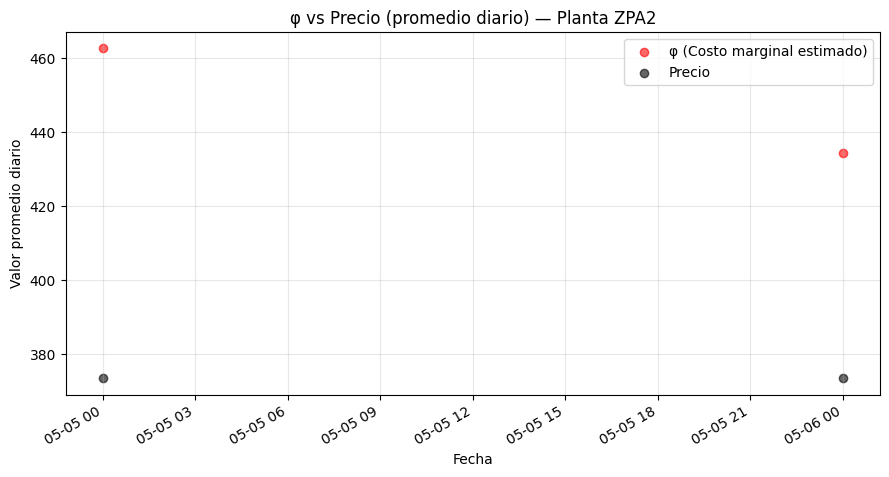

✅ Gráfico guardado: ../results/fechas_2/phi_precio_ZPA2_2025-05-05_to_2025-05-06_M1.png


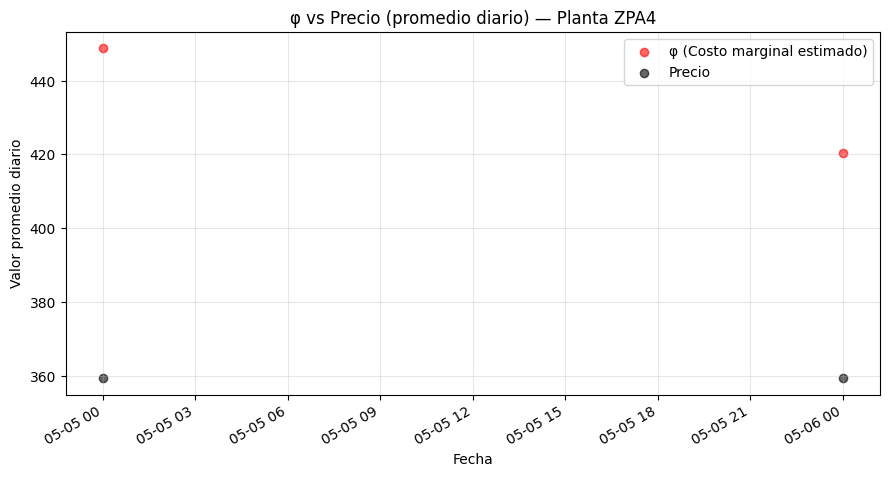

✅ Gráfico guardado: ../results/fechas_2/phi_precio_ZPA4_2025-05-05_to_2025-05-06_M1.png


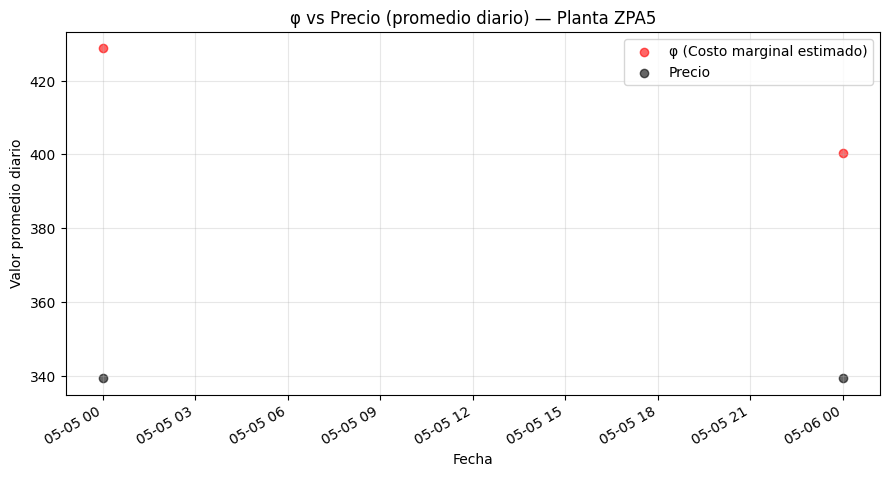

✅ Gráfico guardado: ../results/fechas_2/phi_precio_ZPA5_2025-05-05_to_2025-05-06_M1.png


In [29]:

# --- Filtrar filas válidas ---
df_grouped = df_grouped.dropna(subset=['Fecha', 'CodigoPlanta', 'phi', 'precio_d'])

# --- Iterar sobre cada planta ---
for planta in df_grouped['CodigoPlanta'].unique():
    df_planta = (
        df_grouped[df_grouped['CodigoPlanta'] == planta]
        .groupby('Fecha', as_index=False)[['phi', 'precio_d']].mean()
        .sort_values('Fecha')
    )

    plt.figure(figsize=(9, 5))
    plt.scatter(df_planta['Fecha'], df_planta['phi'], color='red', label='φ (Costo marginal estimado)', alpha=0.6)
    plt.scatter(df_planta['Fecha'], df_planta['precio_d'], color='black', label='Precio', alpha=0.6)

    plt.xlabel("Fecha")
    plt.ylabel("Valor promedio diario")
    plt.title(f"φ vs Precio (promedio diario) — Planta {planta}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.gcf().autofmt_xdate()

    # --- Guardar figura ---
    fecha_min = df_planta['Fecha'].min()
    fecha_max = df_planta['Fecha'].max()
    filename = f"phi_precio_{planta}_{fecha_min}_to_{fecha_max}_M{M}.png"
    filepath = os.path.join(sub_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.show()

    #print(f"✅ Gráfico guardado: {filepath}")


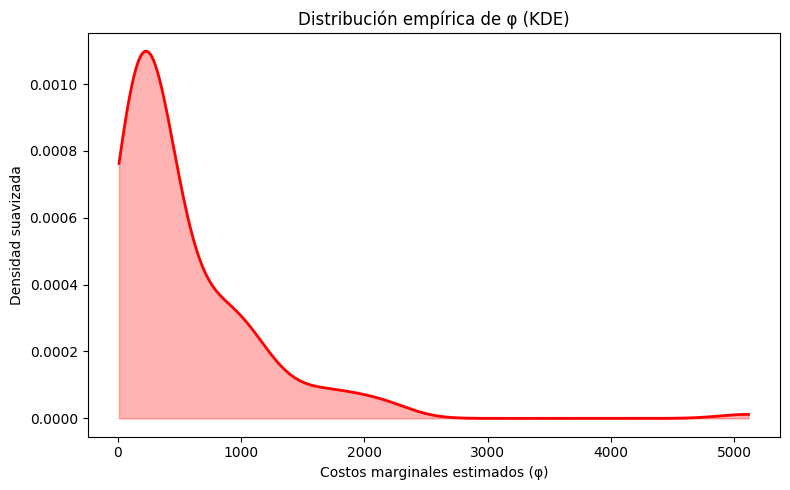

In [31]:

phi = pd.to_numeric(df_grouped['phi'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(phi)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Costos marginales estimados (φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de φ (KDE)")
plt.tight_layout()
plt.show()


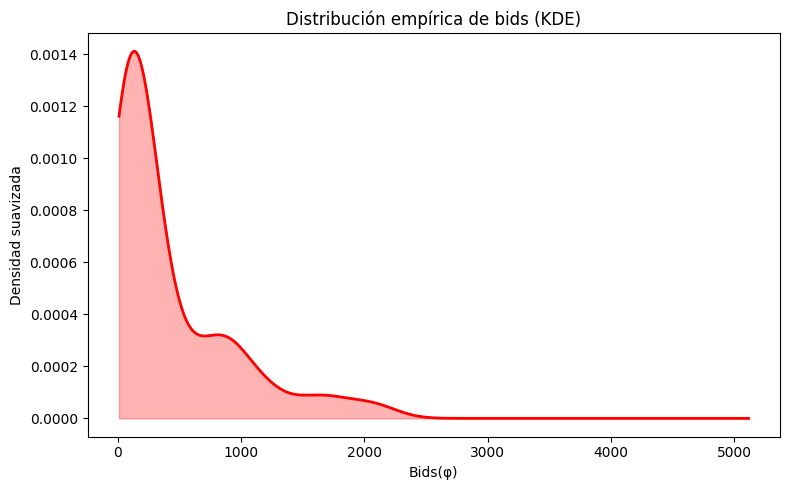

In [32]:
bids = pd.to_numeric(df_grouped['precio_d'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(bids)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Bids(φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de bids (KDE)")
plt.tight_layout()
plt.show()
